# Ferm risk management

### Формулировка задачи:

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».  
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!  
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах.   

Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:  
- Первая будет прогнозировать возможный удой коровы (целевой признак Удой);  
- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).  

С помощью модели нужно отобрать коров по двум критериям:  
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

**Содержание:** <a class="anchor" id="0-bullet"></a>

1. [Загрузка данных](#1-bullet)   
    1.1 [Изучение загруженных датасетов](#1.1-bullet)   
    1.2 [Визуализация наличие пропусков в датасетах](#1.2-bullet)      
2. [Предобработка данных](#2-bullet)  
    2.1 [Исправление наименования столбцов в датафрейме](#2.1-bullet)   
    2.2 [Изменение типов данных](#2.2-bullet)   
    2.3 [Обработка дубликатов](#2.3-bullet)   
3. [Исследовательский анализ данных](#3-bullet)  
    3.1 [Функции для построения графиков зависимости для каждого количественных и качественных признаков](#3.1-bullet)  
    3.2 [Анализ количественных и качественных признаков](#3.2-bullet)   
4. [Корреляционный анализ](#4-bullet)  
    4.1 [Отображение взаимосвязи между признаками](#4.1-bullet)  
    4.2 [Отображение диаграммы рассеяния для признака `Удой` и всех количественных признаков с категориальными](#4.2-bullet) 
5. [Задача регрессии](#5-bullet)  
    5.1 [Модель №1](#5.1-bullet)  
    5.2 [Модель №2](#5.2-bullet)  
    5.3 [Модель №3](#5.3-bullet)  
    5.4 [Сравнение моделей](#5.4-bullet)   
    5.5 [Качество каждой модели по трём метрикам: MSE, MAE, RMSE](#5.5-bullet)   
    5.6 [Финальная модель](#5.6-bullet)   
6. [Задача классификации](#6-bullet)  
    5.1 [Обучение модели логистической регрессии](#6.1-bullet)  
    6.2 [Анализ модели логистической регрессии](#6.2-bullet)  
    6.3 [Прогноз вкуса молока рассматриваемых коров на обновленной модели](#6.3-bullet)     
7. [Итоговый вывод](#6-bullet)  

### Описание данных

Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент:
- `id` — уникальный идентификатор коровы.
- `Удой`, кг — масса молока, которую корова даёт в год (в килограммах).
- `ЭКЕ` (Энергетическая кормовая единица) — показатель питательности корма коровы.
- `Сырой протеин`, г — содержание сырого протеина в корме (в граммах).
- `СПО` (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Жирность,%` — содержание жиров в молоке (в процентах).
- `Белок,%` — содержание белков в молоке (в процентах).
- `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- `Возраст` — возраст коровы, бинарный признак (менее 2 лет, более 2 лет).

Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера:
- `id` — уникальный идентификатор коровы.
- `Имя Папы` — имя папы коровы.

Файл `cow_buy.csv` содержит данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой:
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Имя_папы` — имя папы коровы.
- `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
- `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
- `Возраст` — возраст коровы, бинарный признак (менее 2 лет, более 2 лет).

In [1]:
%%capture
!pip install missingno

In [2]:
%%capture
!pip install phik

In [3]:
%%capture
!pip install -U scikit-learn

**Имортирование необходимых для анализа библиотек**

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import re
import seaborn as sns
import phik
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, precision_recall_curve, recall_score
from sklearn.metrics import confusion_matrix, r2_score
from scipy.stats import shapiro, normaltest, kstest
import missingno as msno

<a class="anchor" id="1-bullet"></a>
## 1. Загрузка данных

In [5]:
try:
    df_main = pd.read_csv("C:\\Data-science\\ds_csv\\ferma_main.csv", sep=';')
    df_dad = pd.read_csv("C:\\Data-science\\ds_csv\\ferma_dad.csv", sep=';')
    df_cow = pd.read_csv("C:\\Data-science\\ds_csv\\cow_buy.csv", sep=';')
except:
    try:
        df_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
        df_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
        df_cow = pd.read_csv('/datasets/cow_buy.csv', sep=';')
    except:
        raise FileNotFoundError  

<a class="anchor" id="1.1-bullet"></a>
### 1.1 Изучение загруженных датасетов

In [6]:
# Создаем словарь, чтобы связать имена с DataFrame
dataframes = {"df_main": df_main, "df_dad": df_dad, "df_cow": df_cow}

# Размер терминала для линии-разделителя
term_size = os.get_terminal_size()

# Цикл по каждому DataFrame с выводом имени, информации и первых строк
for name, data in dataframes.items():
    print(f'\033[1mНаименование анализируемого датафрейма:\033[0m {name}')
    print()
    data.info()  # Выводим информацию о DataFrame
    display(data.head(5))  # Отображаем первые 5 строк
    print('=' * term_size.columns)  # Линия-разделитель по ширине терминала

OSError: [WinError 6] Неверный дескриптор

<a class="anchor" id="1.2-bullet"></a>
### 1.2 Визуализация наличие пропусков в датасетах

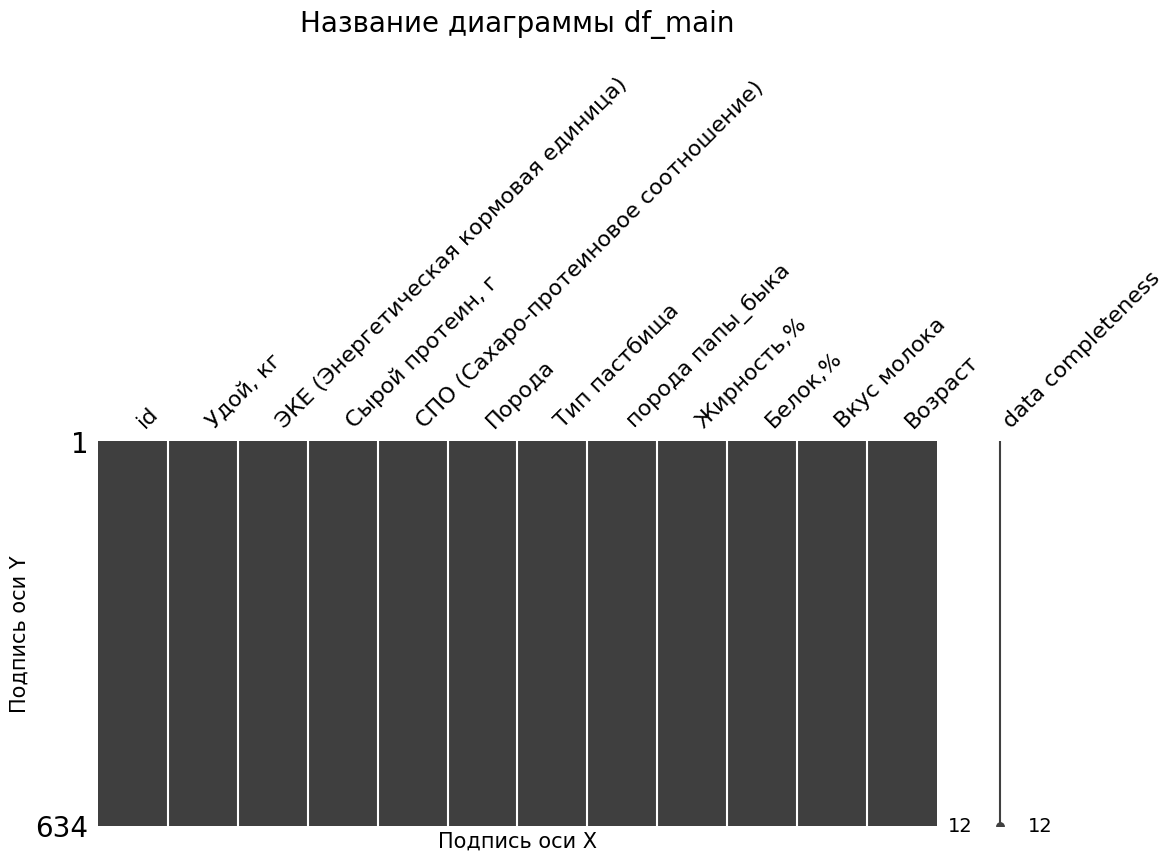

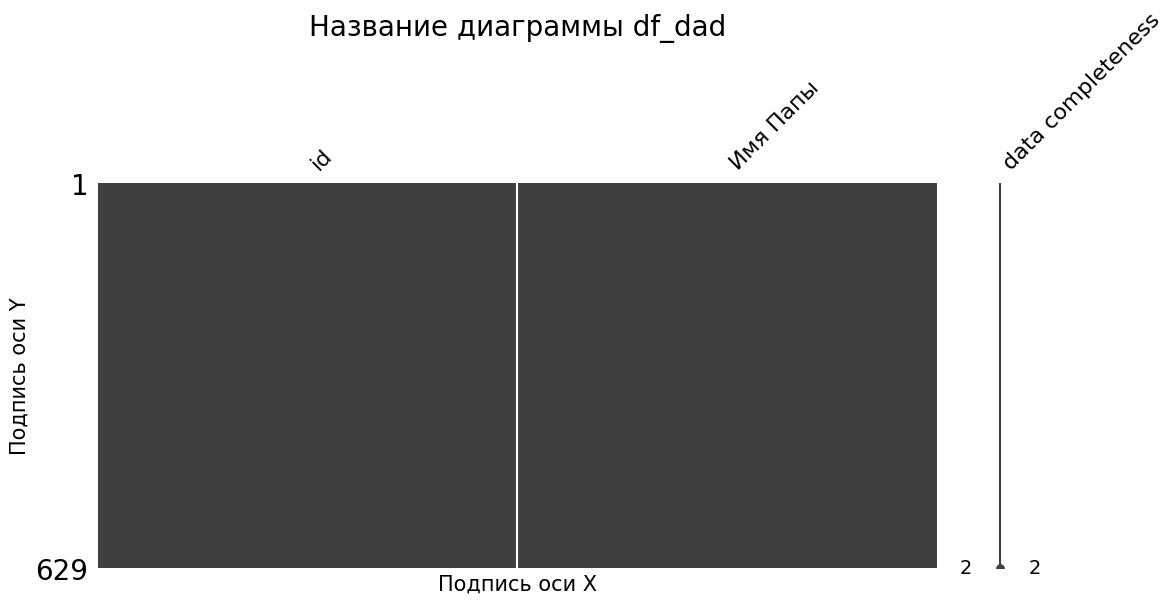

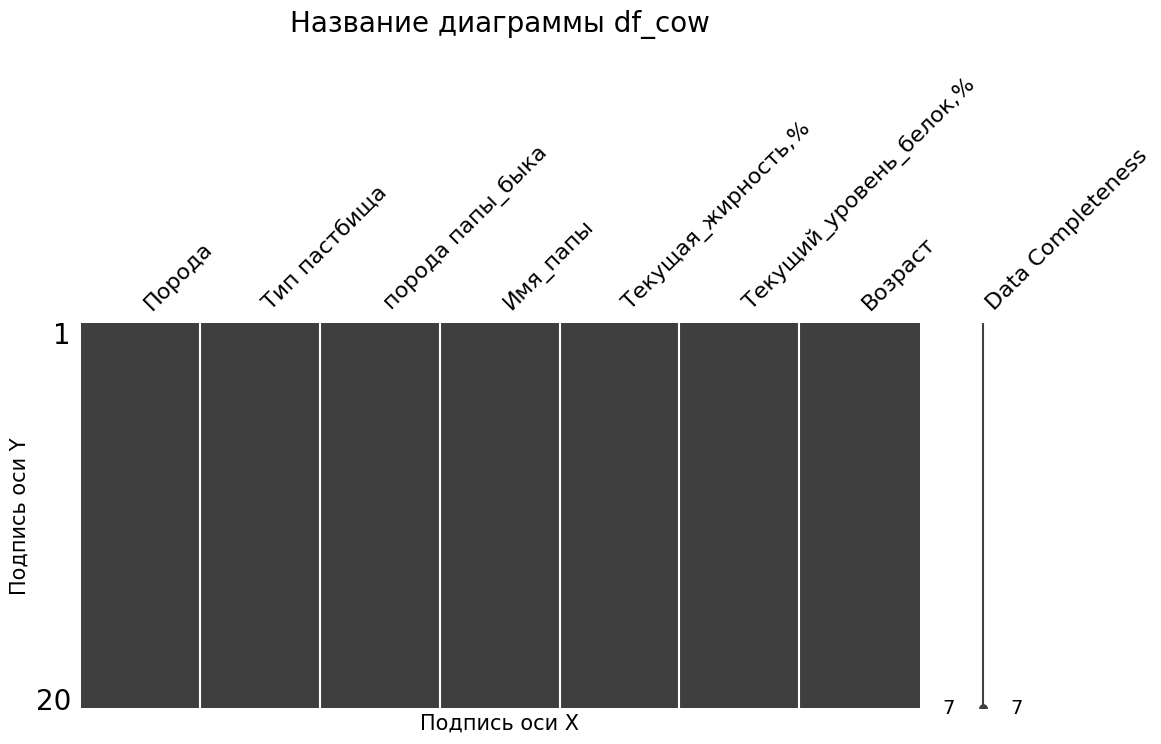

In [ ]:
for name, data in dataframes.items():
    ax = msno.matrix(data, labels=True, figsize=(12, 5))
    ax.set_title(f'Название диаграммы {name}', fontsize=20, pad=30)
    ax.set_xlabel('Подпись оси Х', fontsize=15)
    ax.set_ylabel('Подпись оси Y', fontsize=15)
    plt.show()

### Промежуточный вывод по результатам предварительного анализа

Во всех таблицах неправильное оформление название столбцов.
- В таблице с коровами фермера хранится 634 записи. В записях неправильный тип данных столбцов: `ЭКЕ (Энергетическая кормовая единица)`, `СПО (Сахаро-протеиновое соотношение)`, `Жирность,%`, `Белок,%`;
- Датафрейм с именами отцов коров содержит 629 записей, что указывает на возможное присутствие дубликатов в датайрейме с коровами фермера;
- В данных о коровах для покупки 20 записей. В записях неправильный тип данных столбцов: `Текущая_жирность,%`, `Текущий_уровень_белок,%`;
- Среди данных таблиц нет пропусков.

<a class="anchor" id="2-bullet"></a>
## 2 Предобработка данных

<a class="anchor" id="2.1-bullet"></a>
### 2.1 Исправление наименования столбцов в датафрейме

In [ ]:
# переименование столбцов
df_main.columns = ['id', 'yield', 'efu', 'raw_protein', 'spr', 'breed', 'type_pasture', 'dad_breed', 'fat_content', 'protein', 'taste_milk', 'age']
df_dad.columns = ['id', 'dad_name']
df_cow.columns = ['breed', 'type_pasture', 'dad_breed', 'dad_name', 'fat_content', 'protein', 'age']

# проверка названий столбцов
print(df_main.columns, df_dad.columns, df_cow.columns, sep='\n')

Index(['id', 'yield', 'efu', 'raw_protein', 'spr', 'breed', 'type_pasture',
       'dad_breed', 'fat_content', 'protein', 'taste_milk', 'age'],
      dtype='object')
Index(['id', 'dad_name'], dtype='object')
Index(['breed', 'type_pasture', 'dad_breed', 'dad_name', 'fat_content',
       'protein', 'age'],
      dtype='object')


**Вывод:** Название столбцов датафреймов были приведены к типу snake_case

<a class="anchor" id="2.2-bullet"></a>
### 2.2 Изменение типов данных

In [ ]:
def object_to_float(df, columns):
    """
    Изменение типов данных в столбце с object на float.
    """
    try:
        for col in columns:
            # Заменяем запятые на точки и преобразуем в float
            df[col] = df[col].apply(lambda x: str(x).replace(',', '.')).astype(float)
        return df
    except (ValueError, AttributeError) as e:
        raise TypeError(f"""Ошибка преобразования в столбце '{col}': убедитесь, 
        что в столбцах только числовые значения. Оригинальная ошибка: {e}""")
        

# Пример вызова функции для df_main и df_cow
df_main = object_to_float(df_main, ['fat_content', 'protein', 'efu', 'spr'])
df_cow = object_to_float(df_cow, ['fat_content', 'protein'])

# проверка типов данных
print(df_main.info())
print('=' * term_size.columns)  # Линия-разделитель по ширине терминала
df_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            634 non-null    int64  
 1   yield         634 non-null    int64  
 2   efu           634 non-null    float64
 3   raw_protein   634 non-null    int64  
 4   spr           634 non-null    float64
 5   breed         634 non-null    object 
 6   type_pasture  634 non-null    object 
 7   dad_breed     634 non-null    object 
 8   fat_content   634 non-null    float64
 9   protein       634 non-null    float64
 10  taste_milk    634 non-null    object 
 11  age           634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   breed         20 non-null     ob

**Вывод:** Данные в столбцах датафреймов: `df_main`, `df_cow` были приведены к нужному типу

<a class="anchor" id="2.3-bullet"></a>
### 2.3 Обработка дубликатов

#### <a class="anchor" id="2-3-1-bullet"></a> 2.3.1 Обработка явных дубликатов

In [ ]:
for name, data in dataframes.items():
    print(f"Явных дубликатов в датасете {name} - {data.duplicated().sum()}: "
          if data.duplicated().sum() > 0 else f"Явных дубликатов в датасете {name} - НЕТ")

Явных дубликатов в датасете df_main - 5: 
Явных дубликатов в датасете df_dad - НЕТ
Явных дубликатов в датасете df_cow - 4: 


In [ ]:
# Удаление явных дубликатов
df_main_clean = df_main.drop_duplicates()
df_cow_clean = df_cow.drop_duplicates()

# Перезапись словаря
dataframes = {"df_main": df_main_clean, "df_dad": df_dad, "df_cow": df_cow_clean}

In [ ]:
# Проверка результата удаления явных дубликатов
for name, data in dataframes.items():
    print(f"Явных дубликатов в датасете {name} - {data.duplicated().sum()}: "
          if data.duplicated().sum() > 0 else f"Явных дубликатов в датасете {name} - НЕТ")

Явных дубликатов в датасете df_main - НЕТ
Явных дубликатов в датасете df_dad - НЕТ
Явных дубликатов в датасете df_cow - НЕТ


В ходе анализа явных дубликатов в датафреймах было обнаружено:
- 5 явных дубликатов в датафрейме `df_main`;
- 4 явных дубликатов в датафрейме `df_cow`.

Дубликаты могут повлиять на статистический анализ, но удаление этих дубликатов плохо скажется на работу модели МО, поэтому решено оставить без изменения исходные датафреймы, но для статистического анализа использовать новые датафреймы отчищенные от дубликатов.

<a class="anchor" id="2.3.2-bullet"></a>
#### 2.3.2 Обработка неявных дубликатов

In [ ]:
# Создание листа со столбцами которые надо проверить
columns_for_check = ['breed', 'type_pasture', 'dad_breed']

for col in columns_for_check:
    print(df_main[col].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['Равнинное' 'Равнинные' 'Холмистое']
['Айдиал' 'Соверин' 'Айдиалл']


In [ ]:
# переименование дубликатов
df_main.loc[df_main['type_pasture'] == 'Равнинные', 'type_pasture'] = 'Равнинное'
df_main.loc[df_main['dad_breed'] == 'Айдиалл', 'dad_breed'] = 'Айдиал'
df_main.loc[df_main['breed'] == 'РефлешнСоверинг', 'breed'] = 'Рефлешн Соверинг'

df_main_clean.loc[df_main_clean['type_pasture'] == 'Равнинные', 'type_pasture'] = 'Равнинное'
df_main_clean.loc[df_main_clean['dad_breed'] == 'Айдиалл', 'dad_breed'] = 'Айдиал'
df_main_clean.loc[df_main_clean['breed'] == 'РефлешнСоверинг', 'breed'] = 'Рефлешн Соверинг'

In [ ]:
# Проверка результата
for col in columns_for_check:
    print(df_main[col].unique())

['Вис Бик Айдиал' 'Рефлешн Соверинг']
['Равнинное' 'Холмистое']
['Айдиал' 'Соверин']


In [ ]:
# проверка дубликатов в dad_name
df_dad['dad_name'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [ ]:
# Создание листа со столбцами которые надо проверить
columns_for_check = ['type_pasture', 'dad_breed', 'dad_name', 'breed']

for col in columns_for_check:
    print(df_cow[col].unique())

['холмистое' 'равнинное']
['Айдиал' 'Соверин']
['Геркулес' 'Буйный' 'Барин' 'Соловчик']
['Вис Бик Айдиал' 'РефлешнСоверинг']


In [ ]:
df_cow.loc[df_cow['breed'] == 'РефлешнСоверинг', 'breed'] = 'Рефлешн Соверинг'
df_cow.loc[df_cow['type_pasture'] == 'равнинное', 'type_pasture'] = 'Равнинное'
df_cow.loc[df_cow['type_pasture'] == 'холмистое', 'type_pasture'] = 'Холмистое'

df_cow_clean.loc[df_cow_clean['breed'] == 'РефлешнСоверинг', 'breed'] = 'Рефлешн Соверинг'
df_cow_clean.loc[df_cow_clean['type_pasture'] == 'равнинное', 'type_pasture'] = 'Равнинное'
df_cow_clean.loc[df_cow_clean['type_pasture'] == 'холмистое', 'type_pasture'] = 'Холмистое'

In [ ]:
# Перезапись словаря
dataframes = {"df_main": df_main_clean, "df_dad": df_dad, "df_cow": df_cow_clean}

# Проверка результатов
for name, data in dataframes.items():
    print(f"Явных дубликатов в датасете {name} - {data.duplicated().sum()}: "
          if data.duplicated().sum() > 0 else f"Явных дубликатов в датасете {name} - НЕТ")

Явных дубликатов в датасете df_main - НЕТ
Явных дубликатов в датасете df_dad - НЕТ
Явных дубликатов в датасете df_cow - НЕТ


Были проанализированы и удалены неявные дубликаты

**Общий вывод по предобработке данных:**
- Были приведены названия столбцов датафреймов к типу snake_case;
- Обработаны и удалены явные дубликаты (в количестве 9 штук) и неявные дубликаты;
- Были изменены типы данных для числовых данных в датафреймах.

<a class="anchor" id="3-bullet"></a>
## 3. Исследовательский анализ данных

<a class="anchor" id="3.1-bullet"></a>
### 3.1 Функции для построения графиков зависимости для каждого количественных и качественных признаков

In [ ]:
def show_num_variable(df, column, title, bins=50):
    '''
    Функция отображения гистограммы распределения
    и диаграммы размаха для определенного столбца датафрейма
    '''
    # Создаём фигуру с двумя подграфиками
    f, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 строка, 2 столбца

    # Строим гистограмму на первом подграфике
    sns.histplot(data=df, x=column, bins=bins, ax=axes[0], kde=True)
    axes[0].set(ylabel='Количество коров', xlabel=column)
    axes[0].grid(True)  # Включаем сетку для первого графика

    # Строим коробчатую диаграмму на втором подграфике
    sns.boxplot(data=df, y=column, ax=axes[1])
    axes[1].set(xlabel=column)
    axes[1].grid(True)  # Включаем сетку для второго графика

    # Устанавливаем общий заголовок для фигуры
    plt.suptitle(title)
    plt.tight_layout()  # Подгоняем макет для лучшего расположения элементов
    plt.show()

In [ ]:
def show_cat_variable(df, column, title):
    '''
    Функция отображения соотношения категориальных признаков
    в столбце датафрейма
    '''
    # Увеличиваем размер графика
    plt.figure(figsize=(12, 6))    
    # Строим countplot
    ax = sns.countplot(data=df, x=column)    
    
    # Вычисляем общее количество значений
    total = len(df[column])
    
    # Добавляем проценты на график
    for p in ax.patches:
        # Получаем значение каждой категории
        count = p.get_height()        
        # Вычисляем процент
        percentage = f'{100 * count / total:.1f}%'        
        # Добавляем текст на график
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2., count), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points',
                    fontsize=14, color='black')
    
    # Добавляем сетку для улучшения визуализации
    plt.grid(True, linestyle='--', alpha=0.7)    
    # Устанавливаем заголовок
    plt.title(title)    
    # Устанавливаем подписи для осей
    plt.xlabel(column)
    plt.ylabel('Количество')

    # Показываем график
    plt.tight_layout()  # Подгоняем макет для предотвращения перекрытия
    plt.show()

In [ ]:
def normal_check(data, column, alpha=0.05):
    '''
    Функция проверки нормальности распределения
    по тесту Шапиро — Уилка
    '''
    stat, p = shapiro(data[column])
    print(f"Тест Шапиро — Уилка: Stat={stat}, p={p}")

    # Результат
    if p > alpha:
        return print(f"Распределение данных нормальное с вероятностью более {1 - alpha}.")
    else:
        return print(f"Распределение данных не нормальное с вероятностью более {1 - alpha}.")

<a class="anchor" id="3.2-bullet"></a>
### 3.2 Анализ количественных и качественных признаков

<a class="anchor" id="3.2.1-bullet"></a>
### 3.2.1 Датафрейм df_main

#### Количественные признаки

In [ ]:
display(df_main_clean.describe().round(3))

id      yield      efu  raw_protein      spr  fat_content  protein
count  629.000    629.000  629.000      629.000  629.000      629.000  629.000
mean   315.000   6188.750   14.544     1923.364    0.913        3.604    3.076
std    181.721   1644.795    1.306      182.956    0.032        0.169    0.003
min      1.000   5204.000   10.900     1660.000    0.840        2.990    3.069
25%    158.000   5751.000   13.500     1771.000    0.890        3.590    3.074
50%    315.000   6133.000   14.700     1888.000    0.930        3.650    3.076
75%    472.000   6501.000   15.600     2062.000    0.940        3.720    3.077
max    629.000  45616.000   16.800     2349.000    0.960        3.750    3.085

В данных по удою замечен выброс равный 45616 кг. Он сильно мешает анализу параметра удоя. Его следует удалить и повторить анализ

In [ ]:
# удаление выброса
df_main = df_main.query('`yield` < 8000')
df_main_clean = df_main_clean.query('`yield` < 8000')

In [ ]:
display(df_main_clean.describe().round(3))

id     yield      efu  raw_protein      spr  fat_content  protein
count  628.000   628.000  628.000      628.000  628.000      628.000  628.000
mean   315.475  6125.968   14.549     1923.760    0.913        3.604    3.076
std    181.475   475.857    1.302      182.833    0.032        0.168    0.003
min      1.000  5204.000   10.900     1660.000    0.840        2.990    3.069
25%    158.750  5749.750   13.500     1771.750    0.890        3.590    3.074
50%    315.500  6132.500   14.700     1888.000    0.930        3.650    3.076
75%    472.250  6501.000   15.600     2062.250    0.940        3.720    3.077
max    629.000  7222.000   16.800     2349.000    0.960        3.750    3.085

In [ ]:
# Импортирование библиотеки для увеличения размера окна прокрутки
from IPython.display import display, HTML
display(HTML("<style>div.output_scroll { height: 48em; }</style>"))

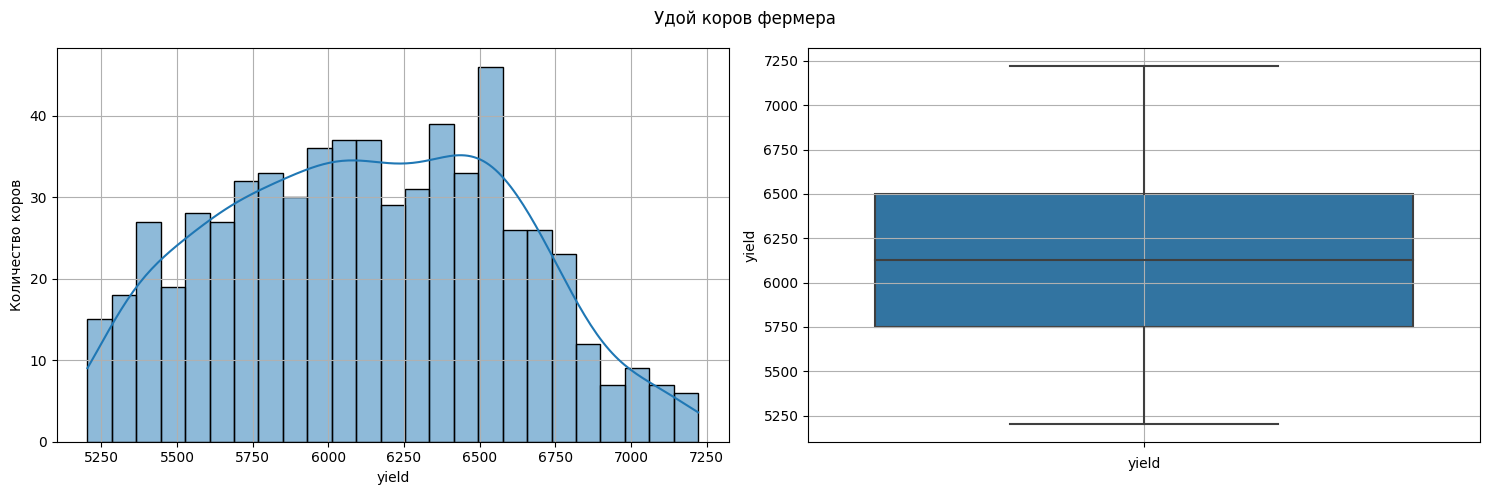

Тест Шапиро — Уилка: Stat=0.9820393323898315, p=5.125514803694387e-07
Распределение данных не нормальное с вероятностью более 0.95.


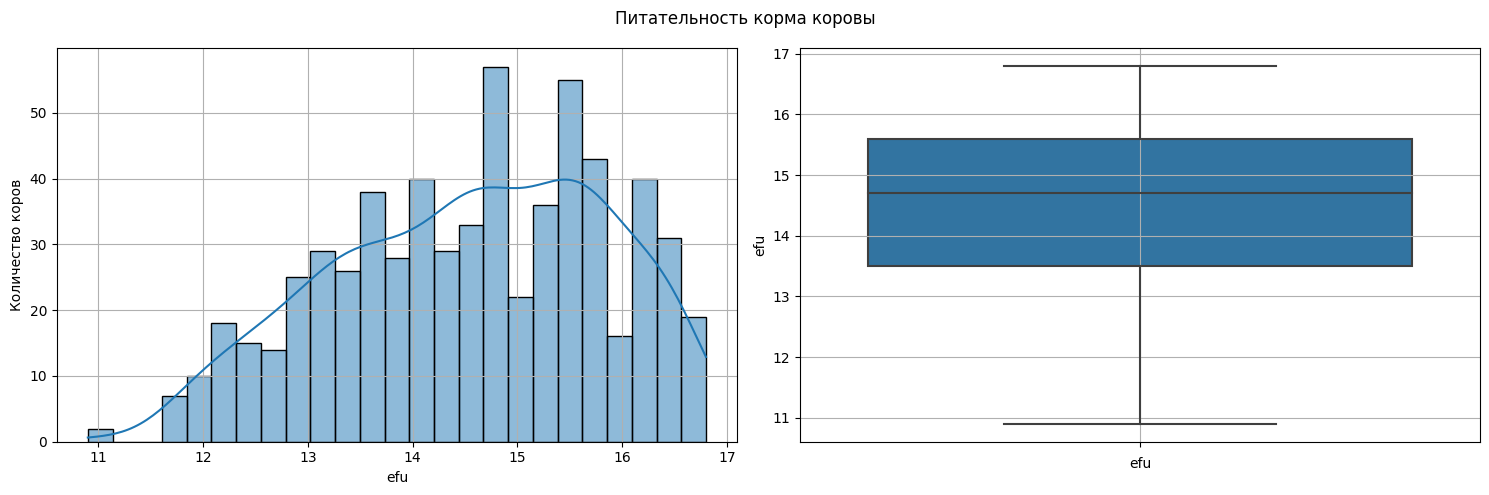

Тест Шапиро — Уилка: Stat=0.9722705483436584, p=1.410053851458315e-09
Распределение данных не нормальное с вероятностью более 0.95.


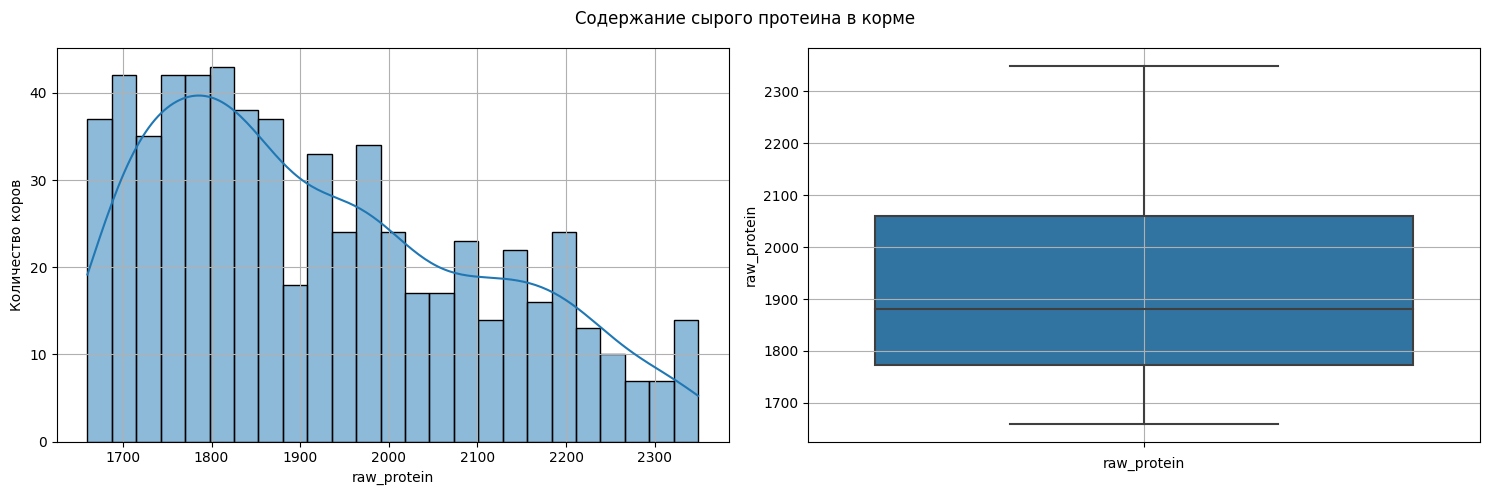

Тест Шапиро — Уилка: Stat=0.9433808326721191, p=8.222509655033024e-15
Распределение данных не нормальное с вероятностью более 0.95.


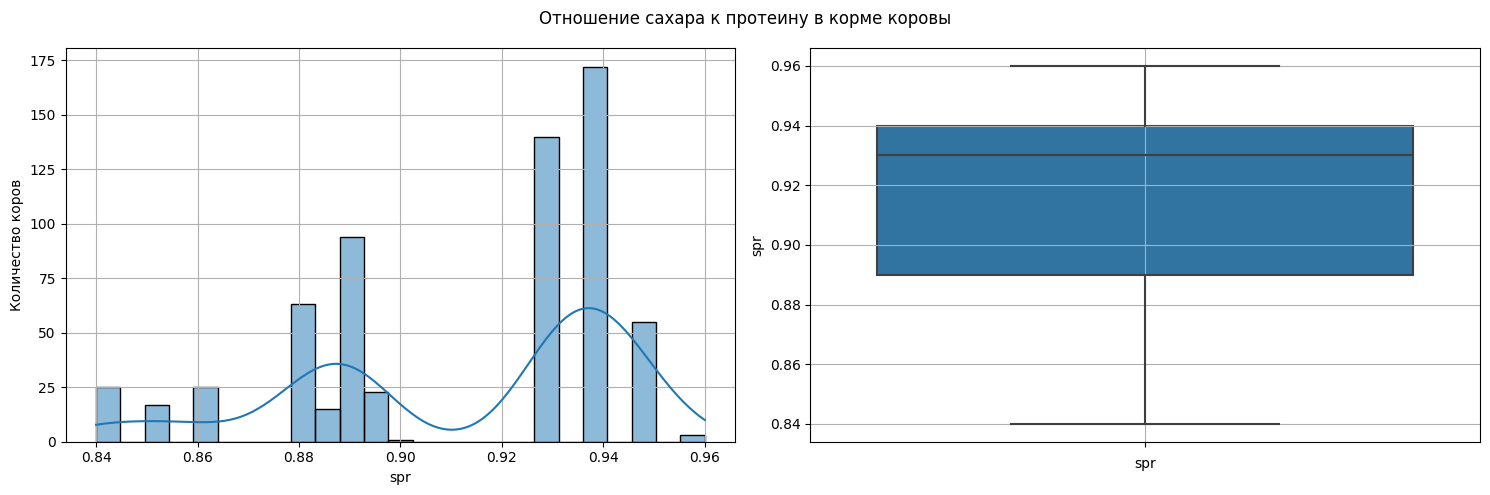

Тест Шапиро — Уилка: Stat=0.8573976755142212, p=1.7117748373324027e-23
Распределение данных не нормальное с вероятностью более 0.95.


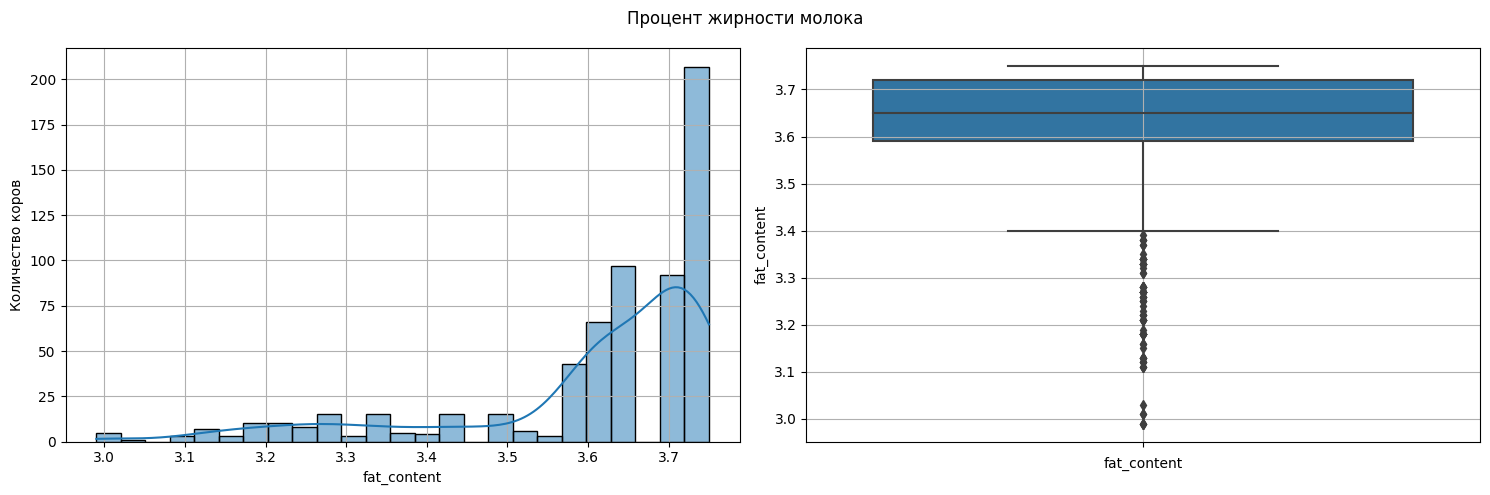

Тест Шапиро — Уилка: Stat=0.7414042353630066, p=3.111010122502061e-30
Распределение данных не нормальное с вероятностью более 0.95.


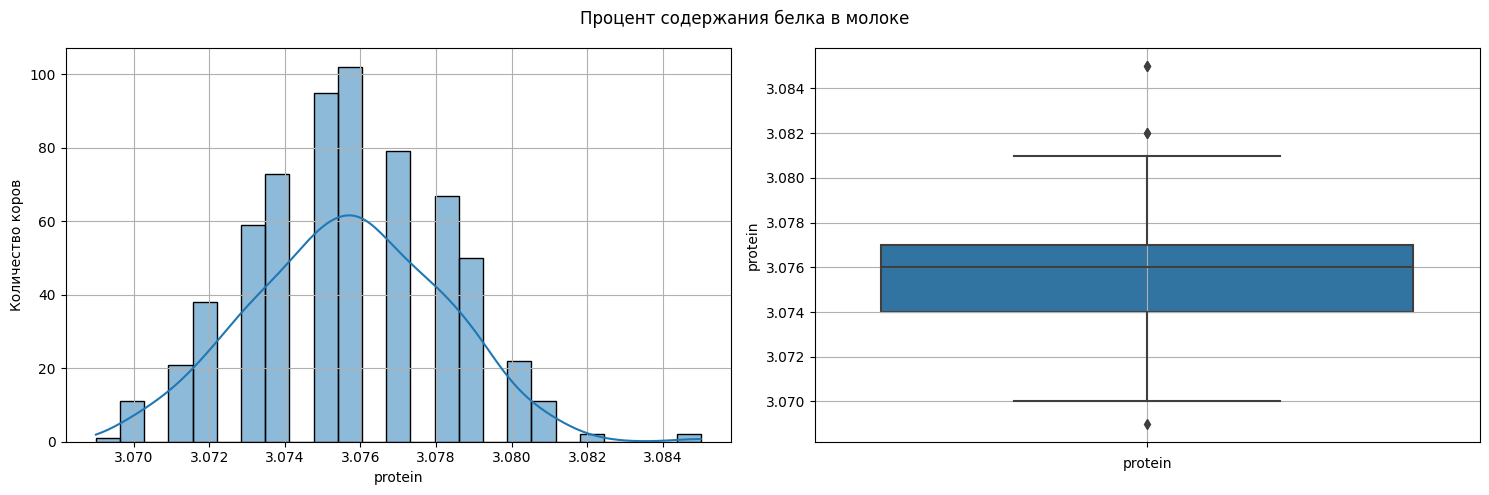

Тест Шапиро — Уилка: Stat=0.9832146167755127, p=1.1655814660116448e-06
Распределение данных не нормальное с вероятностью более 0.95.


In [ ]:
dictionary_main_num = {
    'yield': 'Удой коров фермера',
    'efu': 'Питательность корма коровы',
    'raw_protein': 'Содержание сырого протеина в корме',
    'spr': 'Отношение сахара к протеину в корме коровы',
    'fat_content': 'Процент жирности молока',
    'protein': 'Процент содержания белка в молоке'
}

for key, value in dictionary_main_num.items():
    show_num_variable(df_main, key, value, 25)
    normal_check(df_main, key)
    print('=' * term_size.columns)

**Вывод:** 
- Параметр `yield` (Удой, кг) распределен близко к нормальному со средним значением `mean = 6125.968 кг`, медианным значением `median = 6501 кг`;
- Параметр `efu` (Энергетическая кормовая единица) имеет в распределении левостороннюю асимметрию, среднее значение `mean = 14.544`, медианное значение `median = 14.7 кг`;
- Параметр `raw_protein` (Сырой протеин, г) распределен с правосторонней асимметрией, среднее значение `mean = 1923.364 г`, медианное значение `median = 1888 г`;
- Параметр `spr` (Сахаро-протеиновое соотношение) имеет мультимодальное распределение с 3 горбами: наименьший горб (0.84 - 0.86), второй горб (0.88 - 0.9) и наибольший горб (0.92 - 0.96), среднее значение `mean = 0.913`, медианное значение `median = 0.930`;
- Параметр `fat_content` (Жирность, %).  среднее значение `mean = 3.604 %`, медианное значение `median = 3.650 %`;
- Параметр `protein` (Содержание белка, %). Данные содержания белка в молоке коровы распределены не нормально, среднее значение `mean = 3.076 %`, медианное значение `median = 3.076 %`.

#### Качественные признаки

In [ ]:
display(df_main.describe(include='object').round(3))

breed type_pasture dad_breed taste_milk          age
count              633          633       633        633          633
unique               2            2         2          2            2
top     Вис Бик Айдиал    Холмистое    Айдиал     вкусно  более_2_лет
freq               372          355       317        370          523

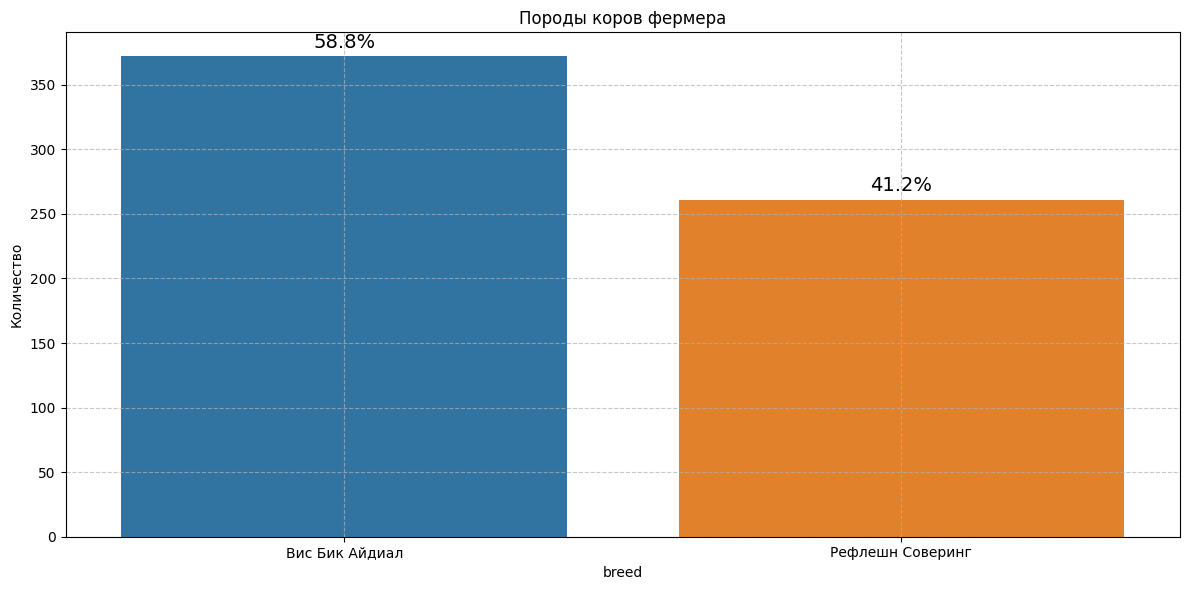

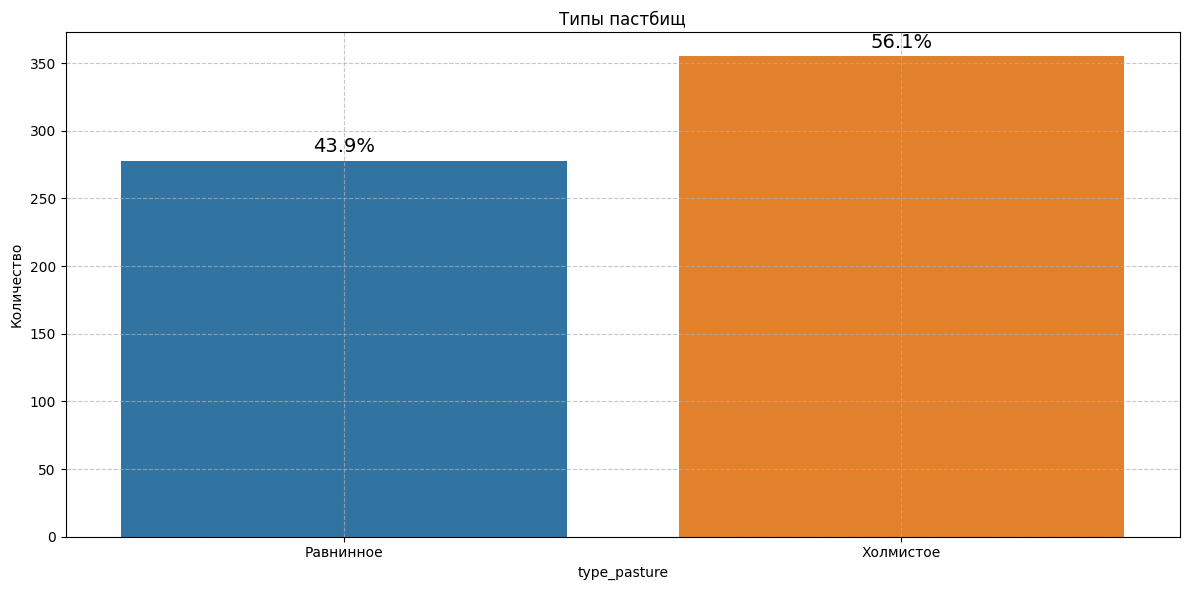

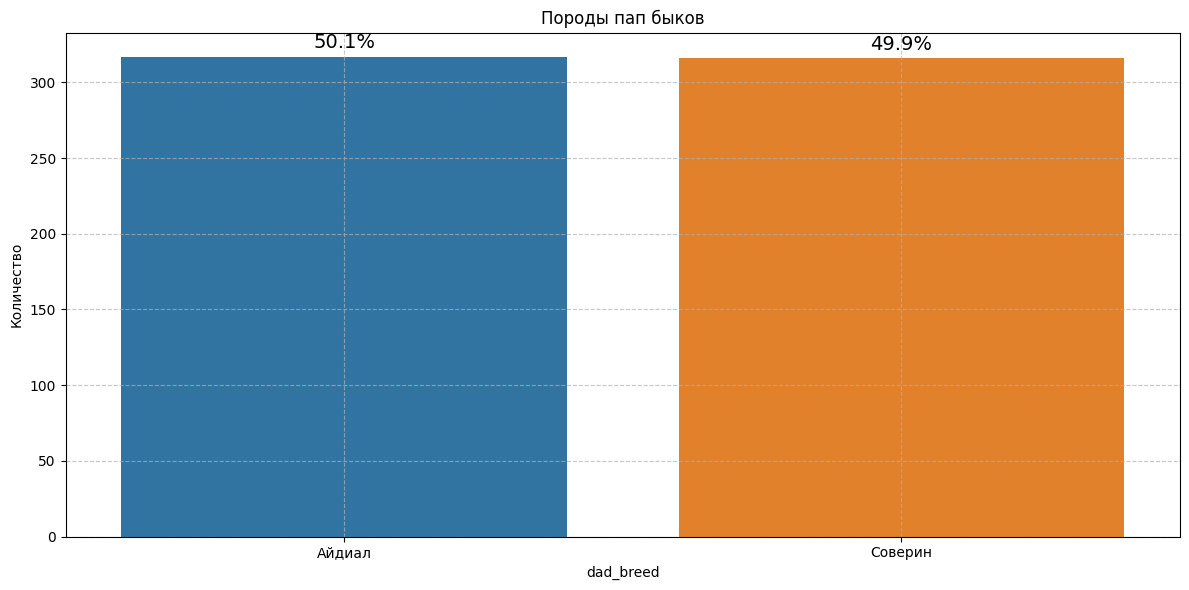

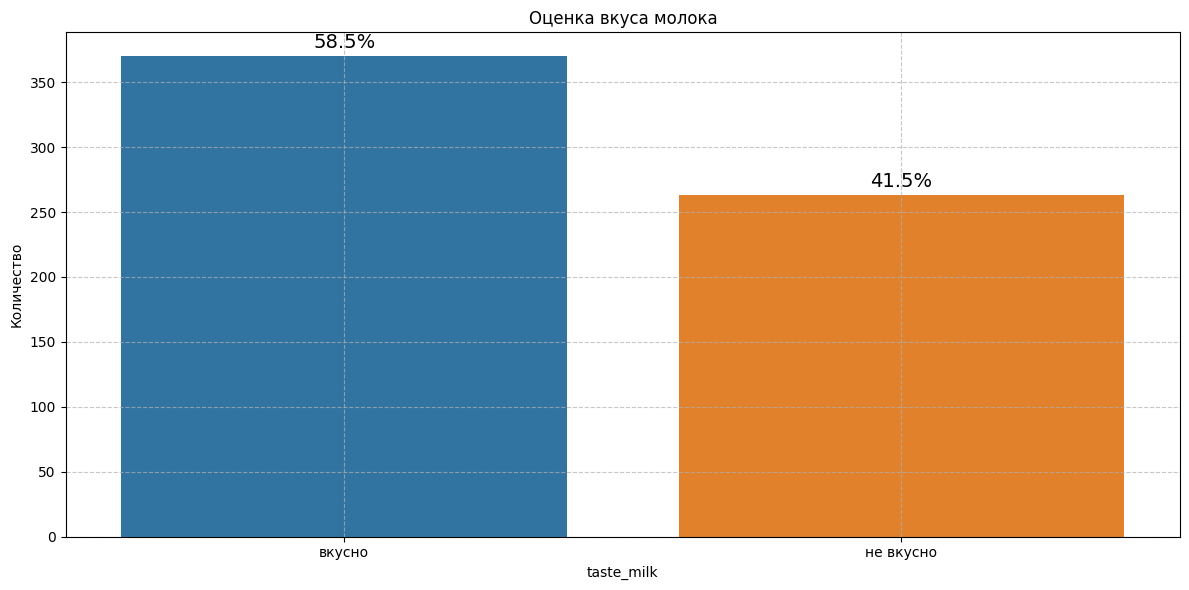

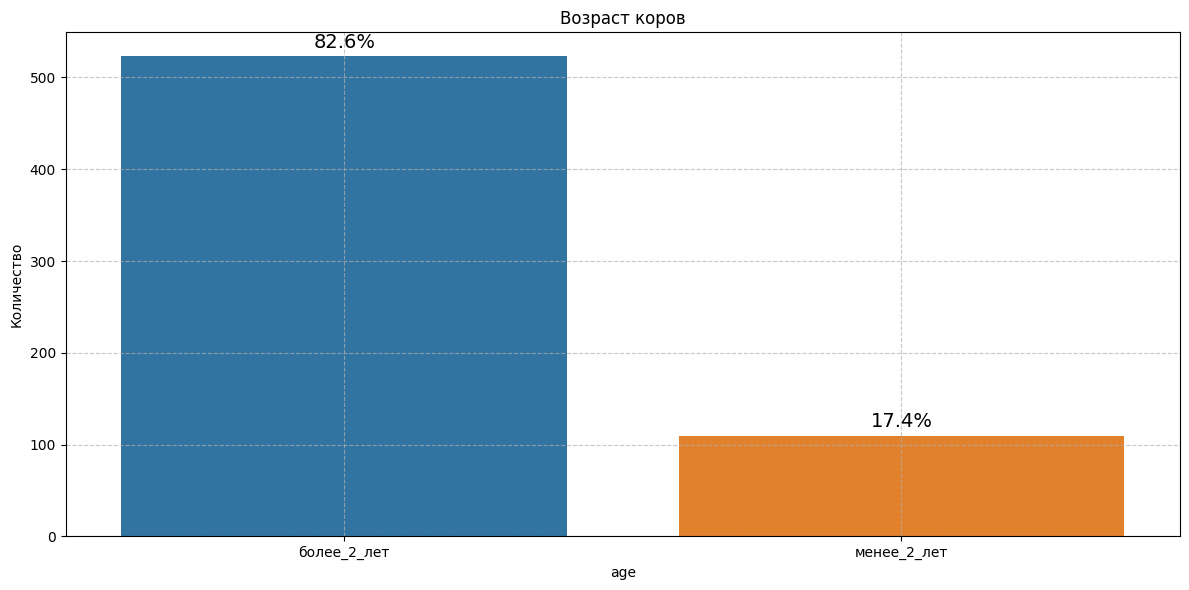

In [ ]:
dictionary_main_cat = {
    'breed': 'Породы коров фермера',
    'type_pasture': 'Типы пастбищ',
    'dad_breed': 'Породы пап быков',
    'taste_milk': 'Оценка вкуса молока',
    'age': 'Возраст коров'
}

for key, value in dictionary_main_cat.items():
    show_cat_variable(df_main, key, value)
    print('=' * term_size.columns)

**Вывод:** 
- Коровы породы Вис Бик Айдиал больше распростронены у фермера (58.8 %), чем Рефлешн Соверинг (41.2 %);
- Холмистый тип пастбищ немного преобладает над равнинным 56.1 % против 43.9 %;
- Соотношение пород пап коров практически равное: Айдиал 50.1 % - Соверинг 49.9 %;
- По оценке фермера 58.5 % молока - вкусное.
- Большая часть коров у фермера (82.6 %) старше 2-х лет. Это может плохо повлиять на модель МО.

<a class="anchor" id="3.2.2-bullet"></a>
### 3.2.2 Датафрейм df_dad

#### Качественные признаки

In [ ]:
display(df_dad.describe(include='object').round(3))

dad_name
count       629
unique        4
top       Барин
freq        240

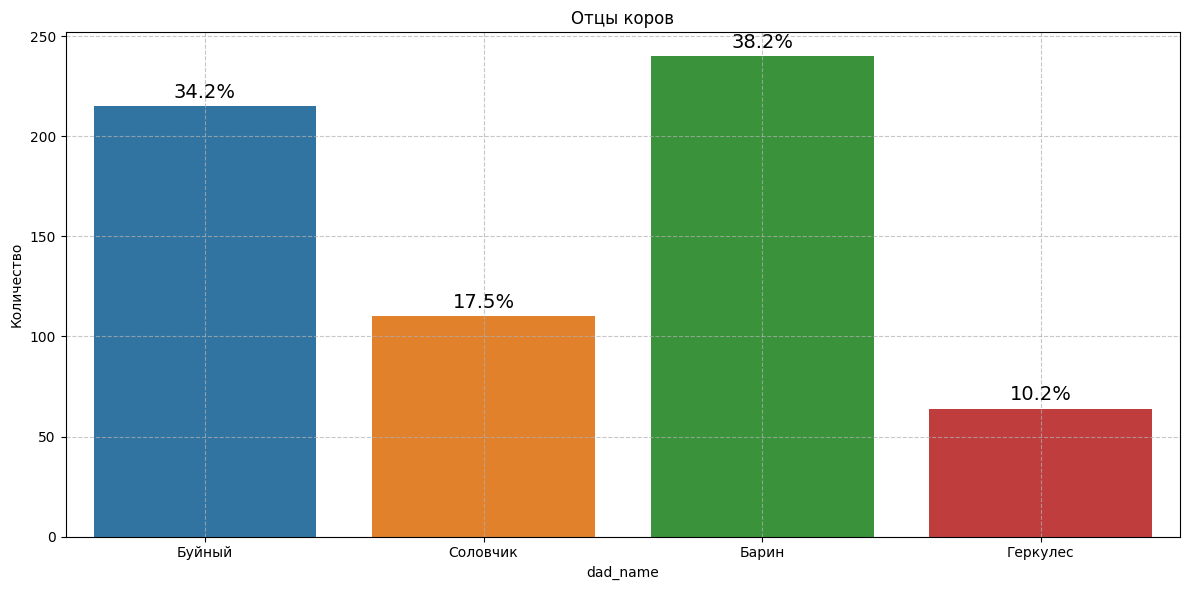

In [ ]:
show_cat_variable(df_dad, 'dad_name', 'Отцы коров')

**Вывод:**
Наиболее распростроненные имена пап коров - Барин (38.2 %) и Буйный (34.2 %), наименее - Соловчик (17.5 %) и Генркулес (10.2 %) 

<a class="anchor" id="3.2.3-bullet"></a>
### 3.2.3 Датафрейм df_cow

#### Количественные признаки

In [ ]:
display(df_cow_clean.describe().round(3))

fat_content  protein
count       16.000   16.000
mean         3.572    3.068
std          0.142    0.011
min          3.340    3.046
25%          3.415    3.060
50%          3.585    3.074
75%          3.692    3.077
max          3.770    3.081

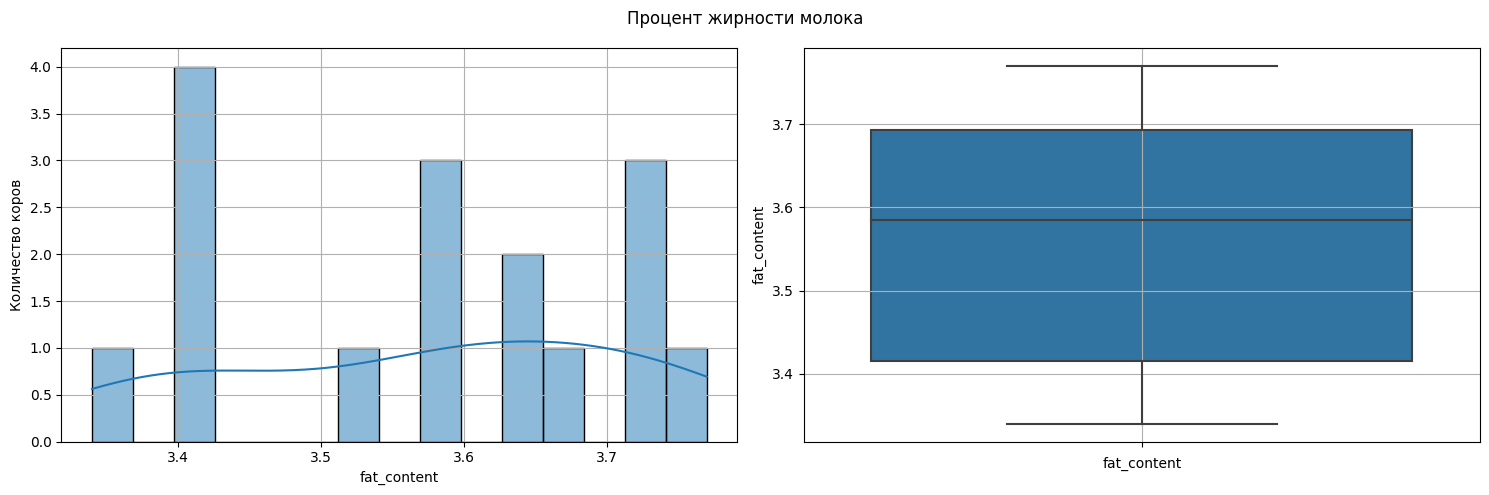

Тест Шапиро — Уилка: Stat=0.7414042353630066, p=3.111010122502061e-30
Распределение данных не нормальное с вероятностью более 0.95.


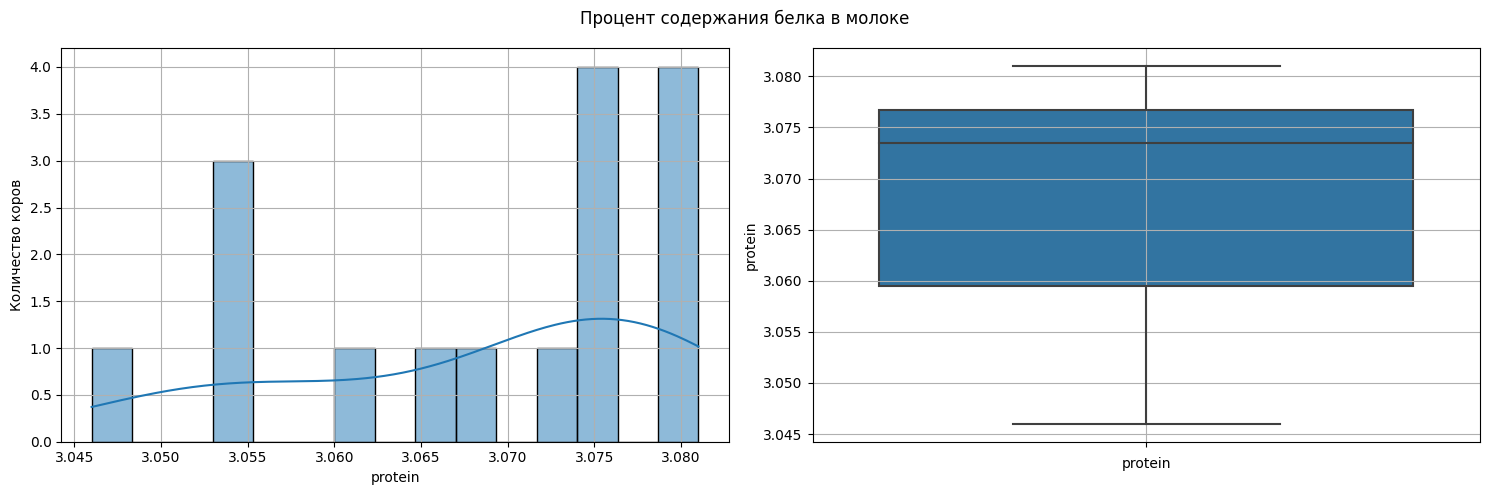

Тест Шапиро — Уилка: Stat=0.9832146167755127, p=1.1655814660116448e-06
Распределение данных не нормальное с вероятностью более 0.95.


In [ ]:
dictionary_cow_num = {
    'fat_content': 'Процент жирности молока',
    'protein': 'Процент содержания белка в молоке'
}

for key, value in dictionary_cow_num.items():
    show_num_variable(df_cow_clean, key, value, 15)
    normal_check(df_main, key)
    print('=' * term_size.columns)

**Вывод:**   
Количественные признаки жирности и процента содержания белка в молоке у рассматриваемых на покупку коров и уже имеющимся стадом фермера схожи, но параметр `protein` в датафрейме df_cow, не имеет какой-то зависимоти в распределении.

#### Качественные признаки

In [ ]:
display(df_cow_clean.describe(include='object').round(3))

breed type_pasture dad_breed dad_name          age
count               16           16        16       16           16
unique               2            2         2        4            2
top     Вис Бик Айдиал    Холмистое   Соверин   Буйный  более_2_лет
freq                 8            8        10        7           11

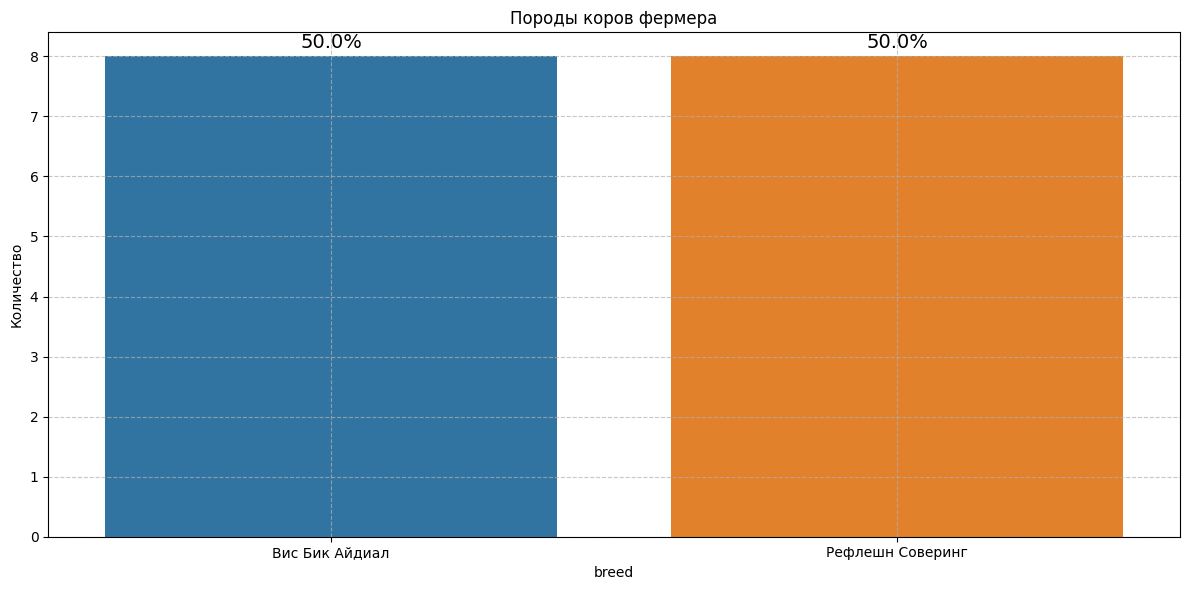

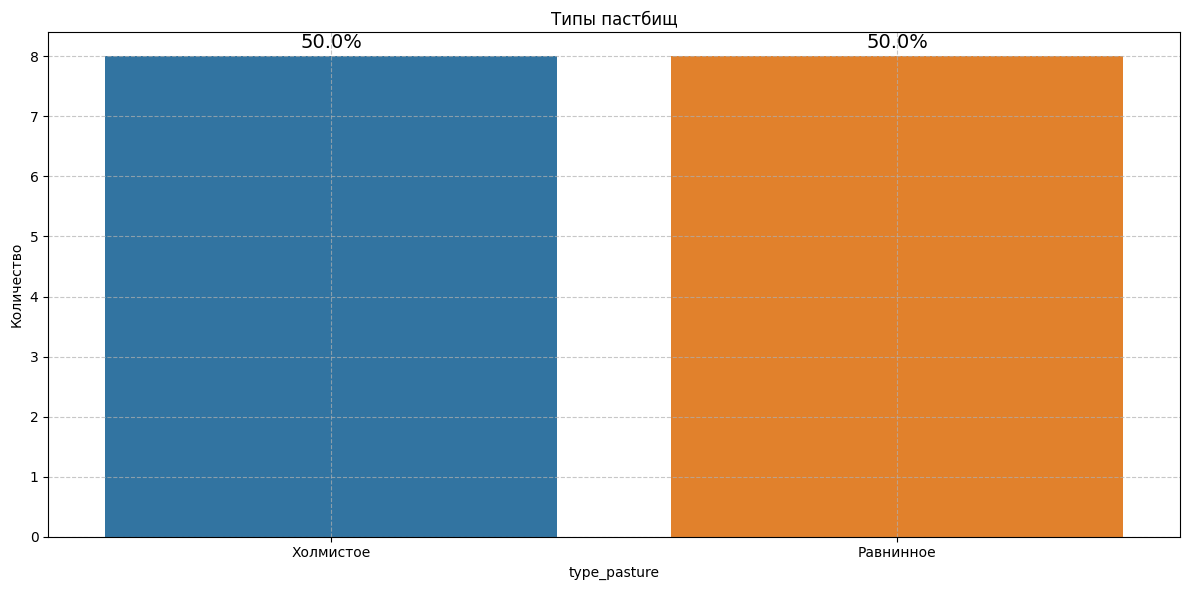

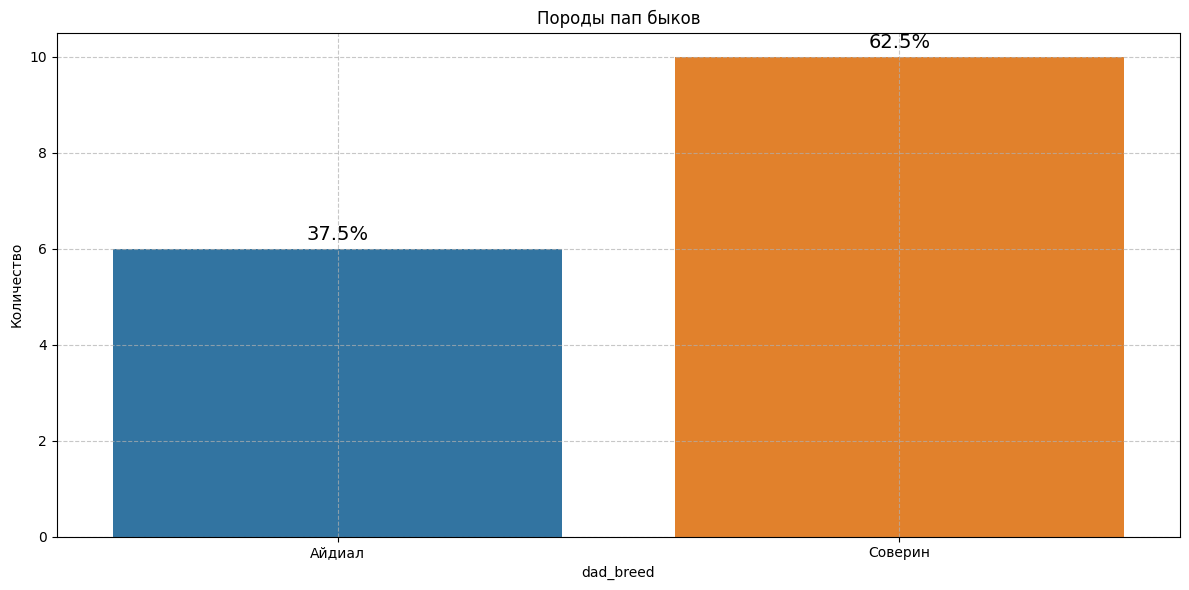

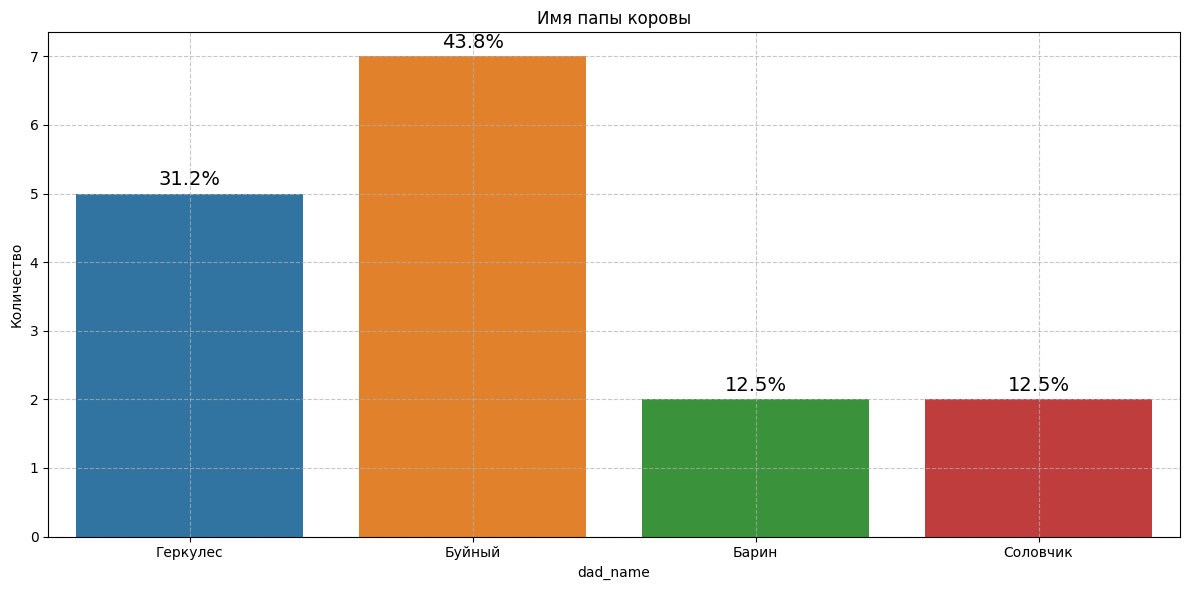

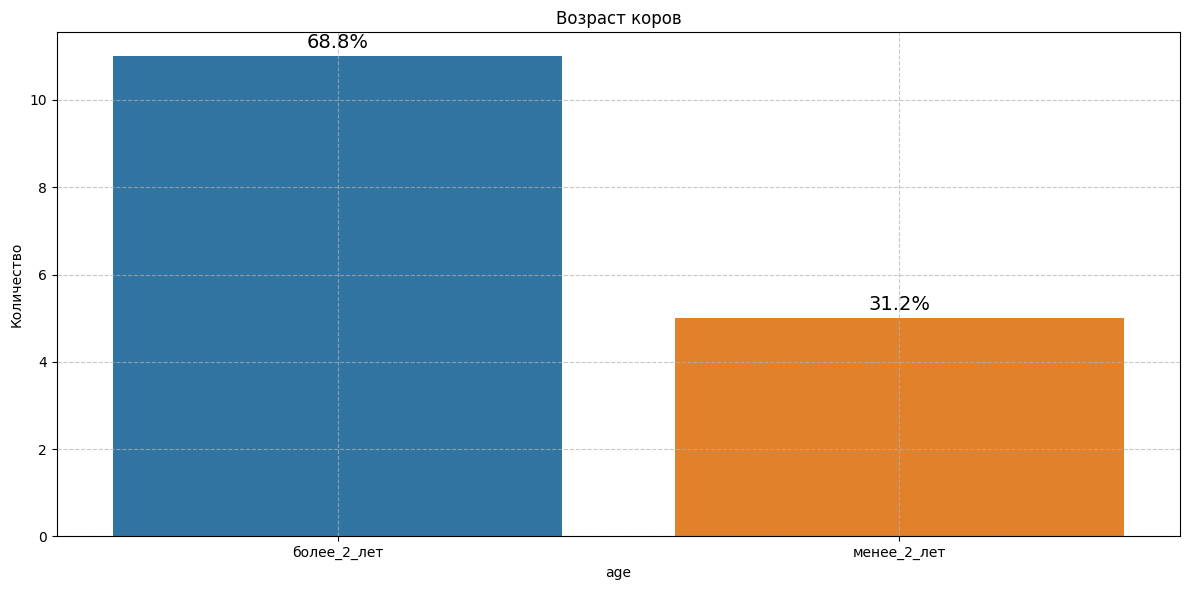

In [ ]:
dictionary_cow_cat = {
    'breed': 'Породы коров фермера',
    'type_pasture': 'Типы пастбищ',
    'dad_breed': 'Породы пап быков',
    'dad_name': 'Имя папы коровы',
    'age': 'Возраст коров'
}

for key, value in dictionary_cow_cat.items():
    show_cat_variable(df_cow_clean, key, value)
    print('=' * term_size.columns)

**Общий вывод по исследовательскому анализу данных**

- Было удаленно анамальное значение в стобце `yield` датафрема df_main;
- Параметр `spr` (Сахаро-протеиновое соотношение) имеет мультимодалное распределение с 3 горбами: наименьший горб (0.84 - 0.86), второй горб (0.88 - 0.9) и наибольший горб (0.92 - 0.96), остальные количественные параметры имеют нормальное распределение.
- Больше всего коров старше 2 лет.

<a class="anchor" id="4-bullet"></a>
## 4. Корреляционный анализ

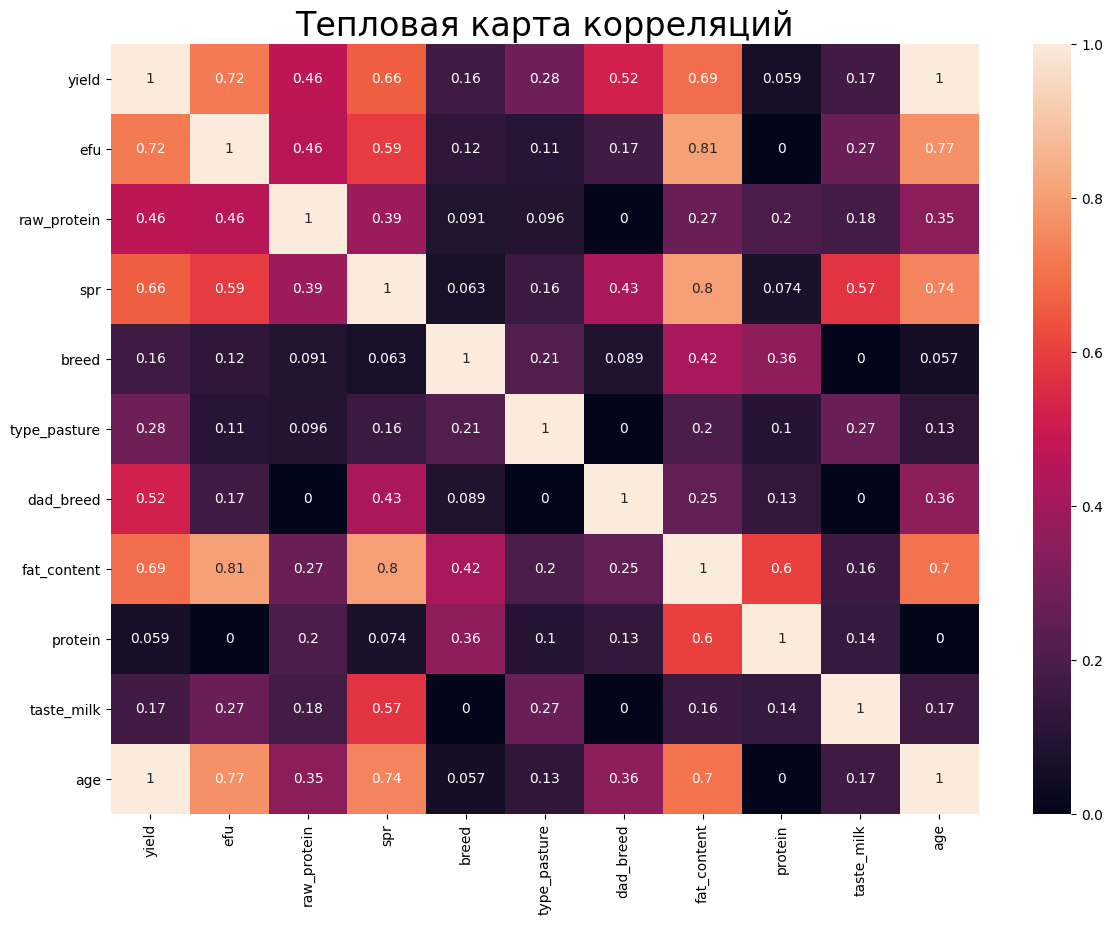

In [ ]:
phik = df_main_clean.drop('id', axis=1)
plt.figure(figsize=(14,10))
sns.heatmap(phik.phik_matrix(
    interval_cols=['yield', 'efu', 'raw_protein', 'spr', 'protein']),
            annot=True)
plt.title('Тепловая карта корреляций', fontsize=24)
plt.show()

**Вывод:**

Cвязь целевого признака `yield` с входными признаками по шкале Чеддока: 
- Наблюдается высокая связь `yield` с `efu` — показатель питательности корма коровы;
- Наблюдается слабая связь `yield` с категориальными признаками: содержанием сырого протеина в корме (`raw_protein`), породой (`breed`), типом пастбища (`type_pasture`), вкусом молока (`taste_milk`);
- Наблюдается очень высокая связь `yield` с `spr` — отношением сахара к белку в корме коровы;
- Наблюдается высокая связь `yield` с `fat_content` — содержанием жиров в молоке (phi_corr = 0.69), но эта зависимось не линейная. Наблюдается три зоны с разной зависимостью с целевой: до 3.5, 3.5-3.65 и более 3.65;
- Наблюдается отсутствие зависимости `yield` с `protein` — содержанием белков в молоке;
- `age` имеет очень высокую взаимосвязь с целевым признаком;
- `dad_breed` имеет среднюю связь с целевым признаком;
- Мультиколлинеарность **отсутствует**: корреляционная матрица показала, что между некоторыми входными признаками есть умеренная корреляция, но нет явных признаков сильной мультиколлинеарности, с которой стоило бы справляться.

**Дополнительно**

C:\anaconda\envs\practicum\lib\site-packages\phik\data_quality.py:82: UserWarning: Not enough unique value for variable taste_milk for analysis 1. Dropping this column
  warnings.warn(


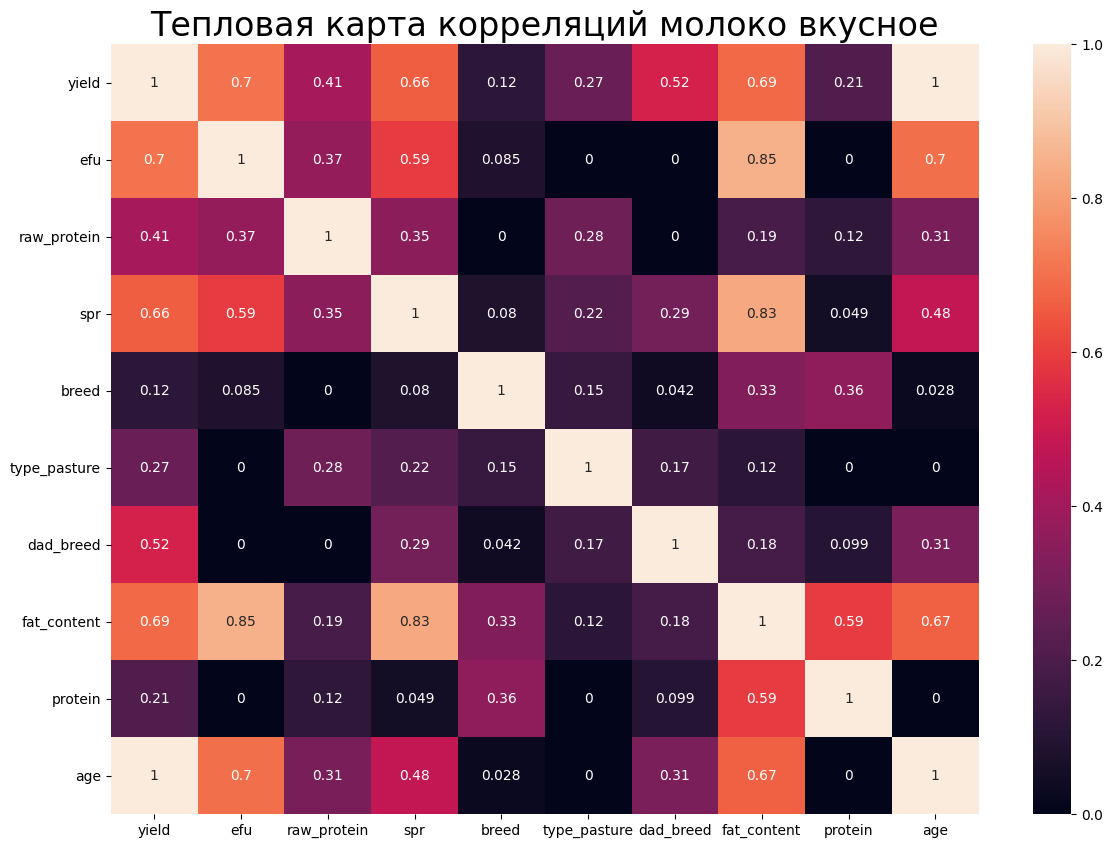

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(phik.query('taste_milk == "вкусно"').phik_matrix(
    interval_cols=['yield', 'efu', 'raw_protein', 'spr', 'protein']),
            annot=True)
plt.title('Тепловая карта корреляций молоко вкусное', fontsize=24)
plt.show()

C:\anaconda\envs\practicum\lib\site-packages\phik\data_quality.py:82: UserWarning: Not enough unique value for variable taste_milk for analysis 1. Dropping this column
  warnings.warn(


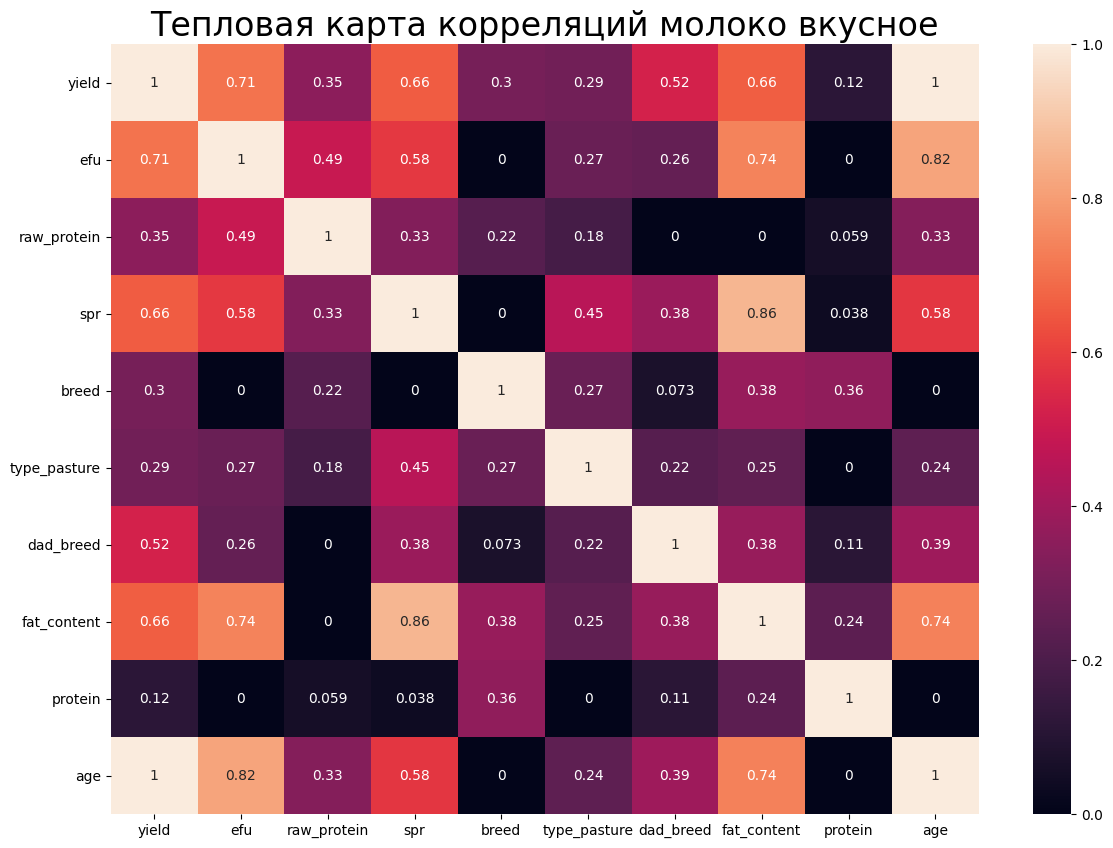

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(phik.query('taste_milk != "вкусно"').phik_matrix(
    interval_cols=['yield', 'efu', 'raw_protein', 'spr', 'protein']),
            annot=True)
plt.title('Тепловая карта корреляций молоко вкусное', fontsize=24)
plt.show()

**Вывод по дополнительным тепловым картам**

Целевой параметр для задачи классификации `taste_milk` имеет связь с входными параметрами.

<a class="anchor" id="4.2-bullet"></a>
### 4.2 Отображение диаграммы рассеяния для признака Удой и всех количественных признаков с категориальных.

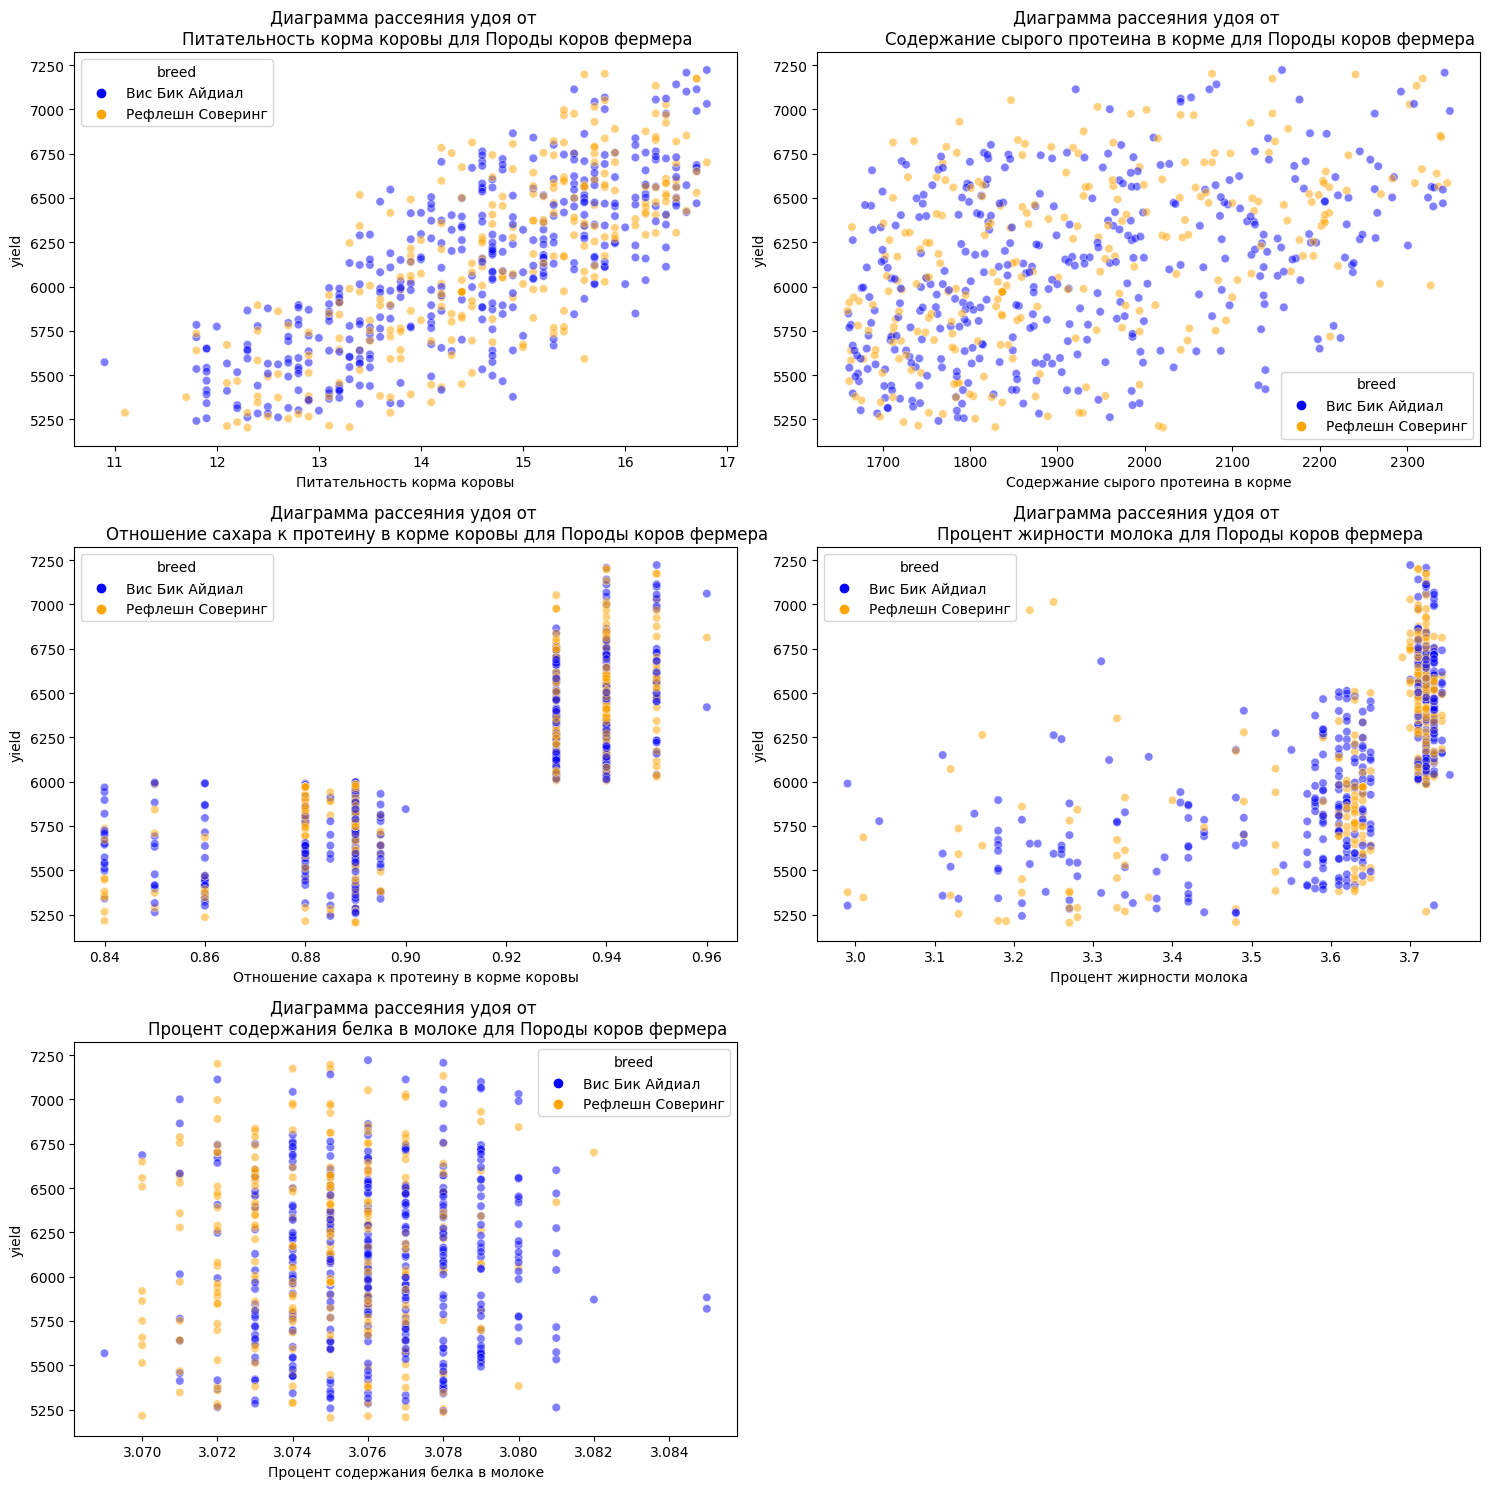

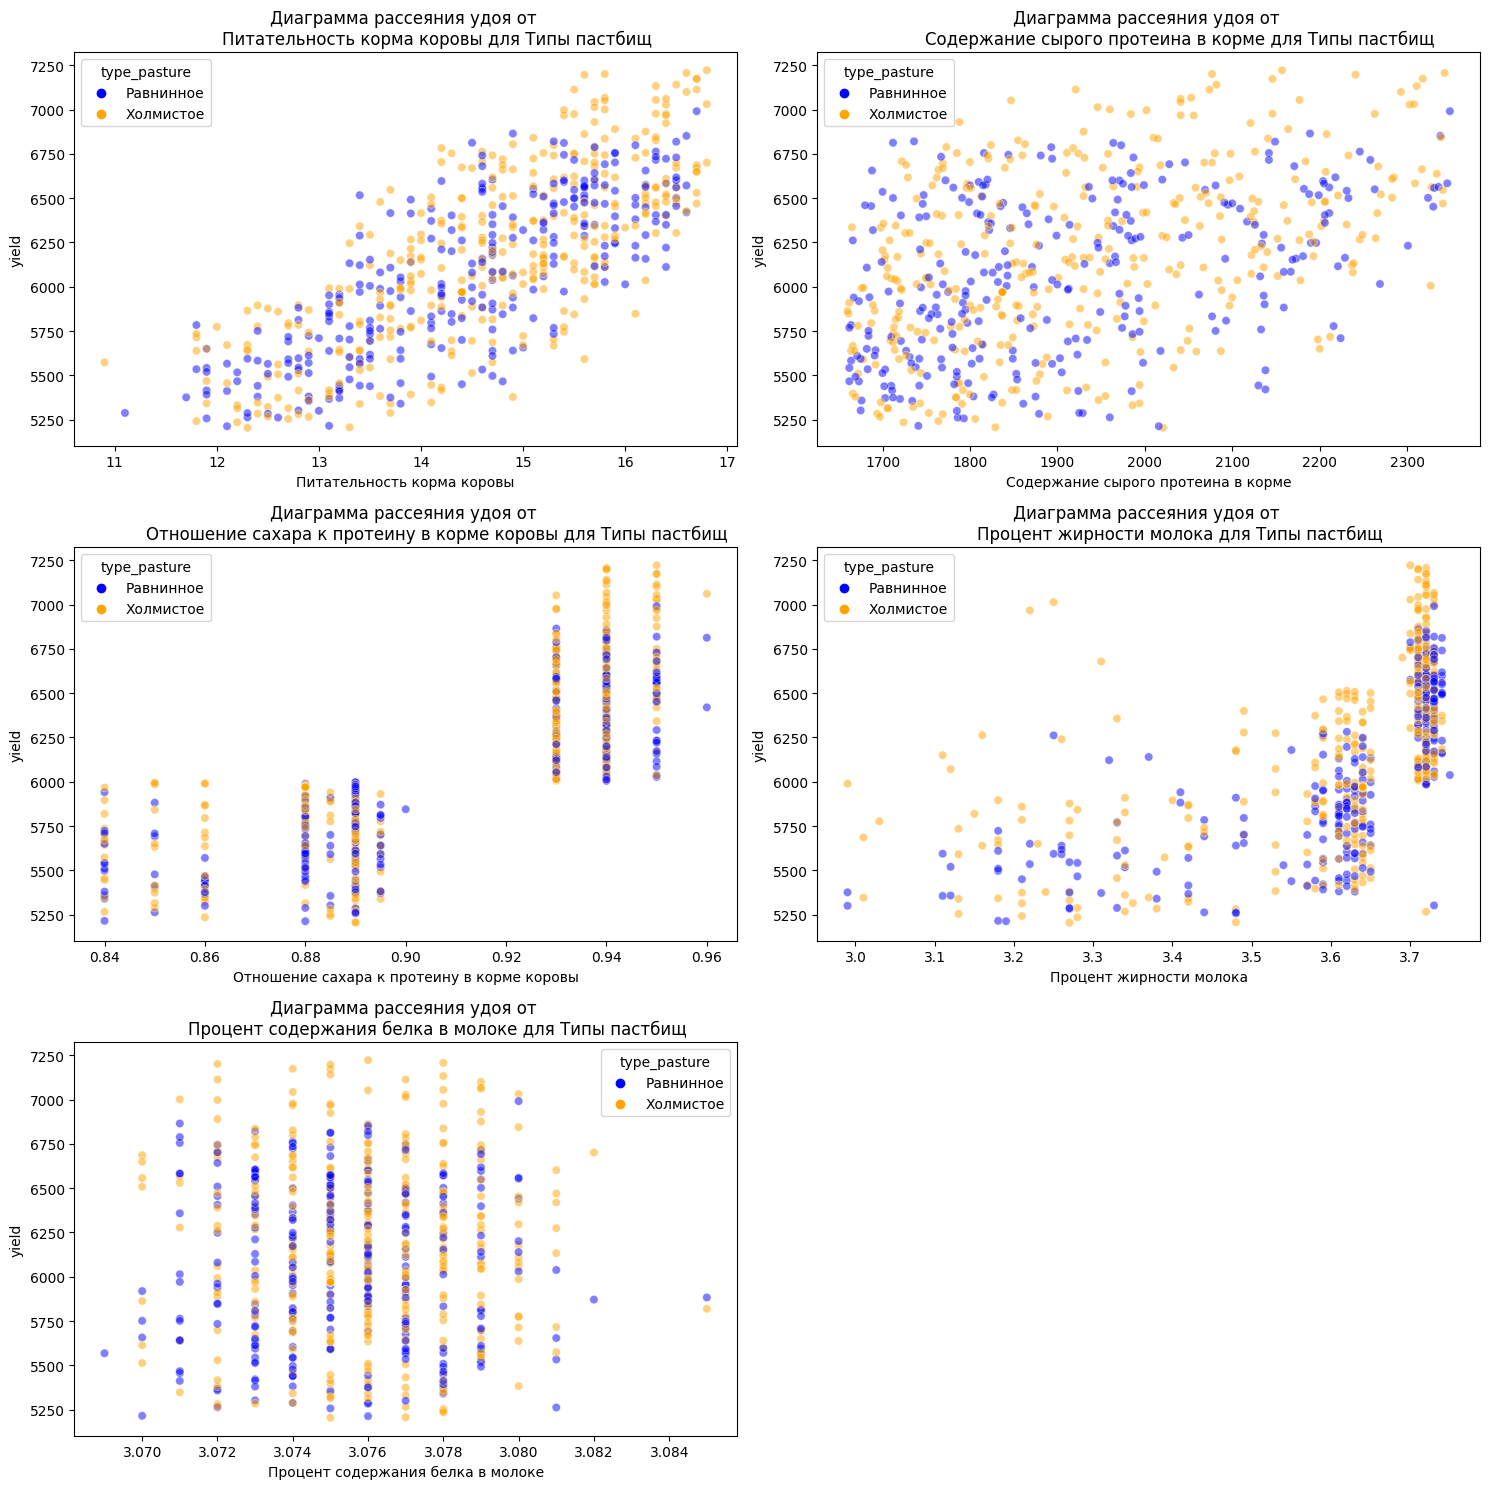

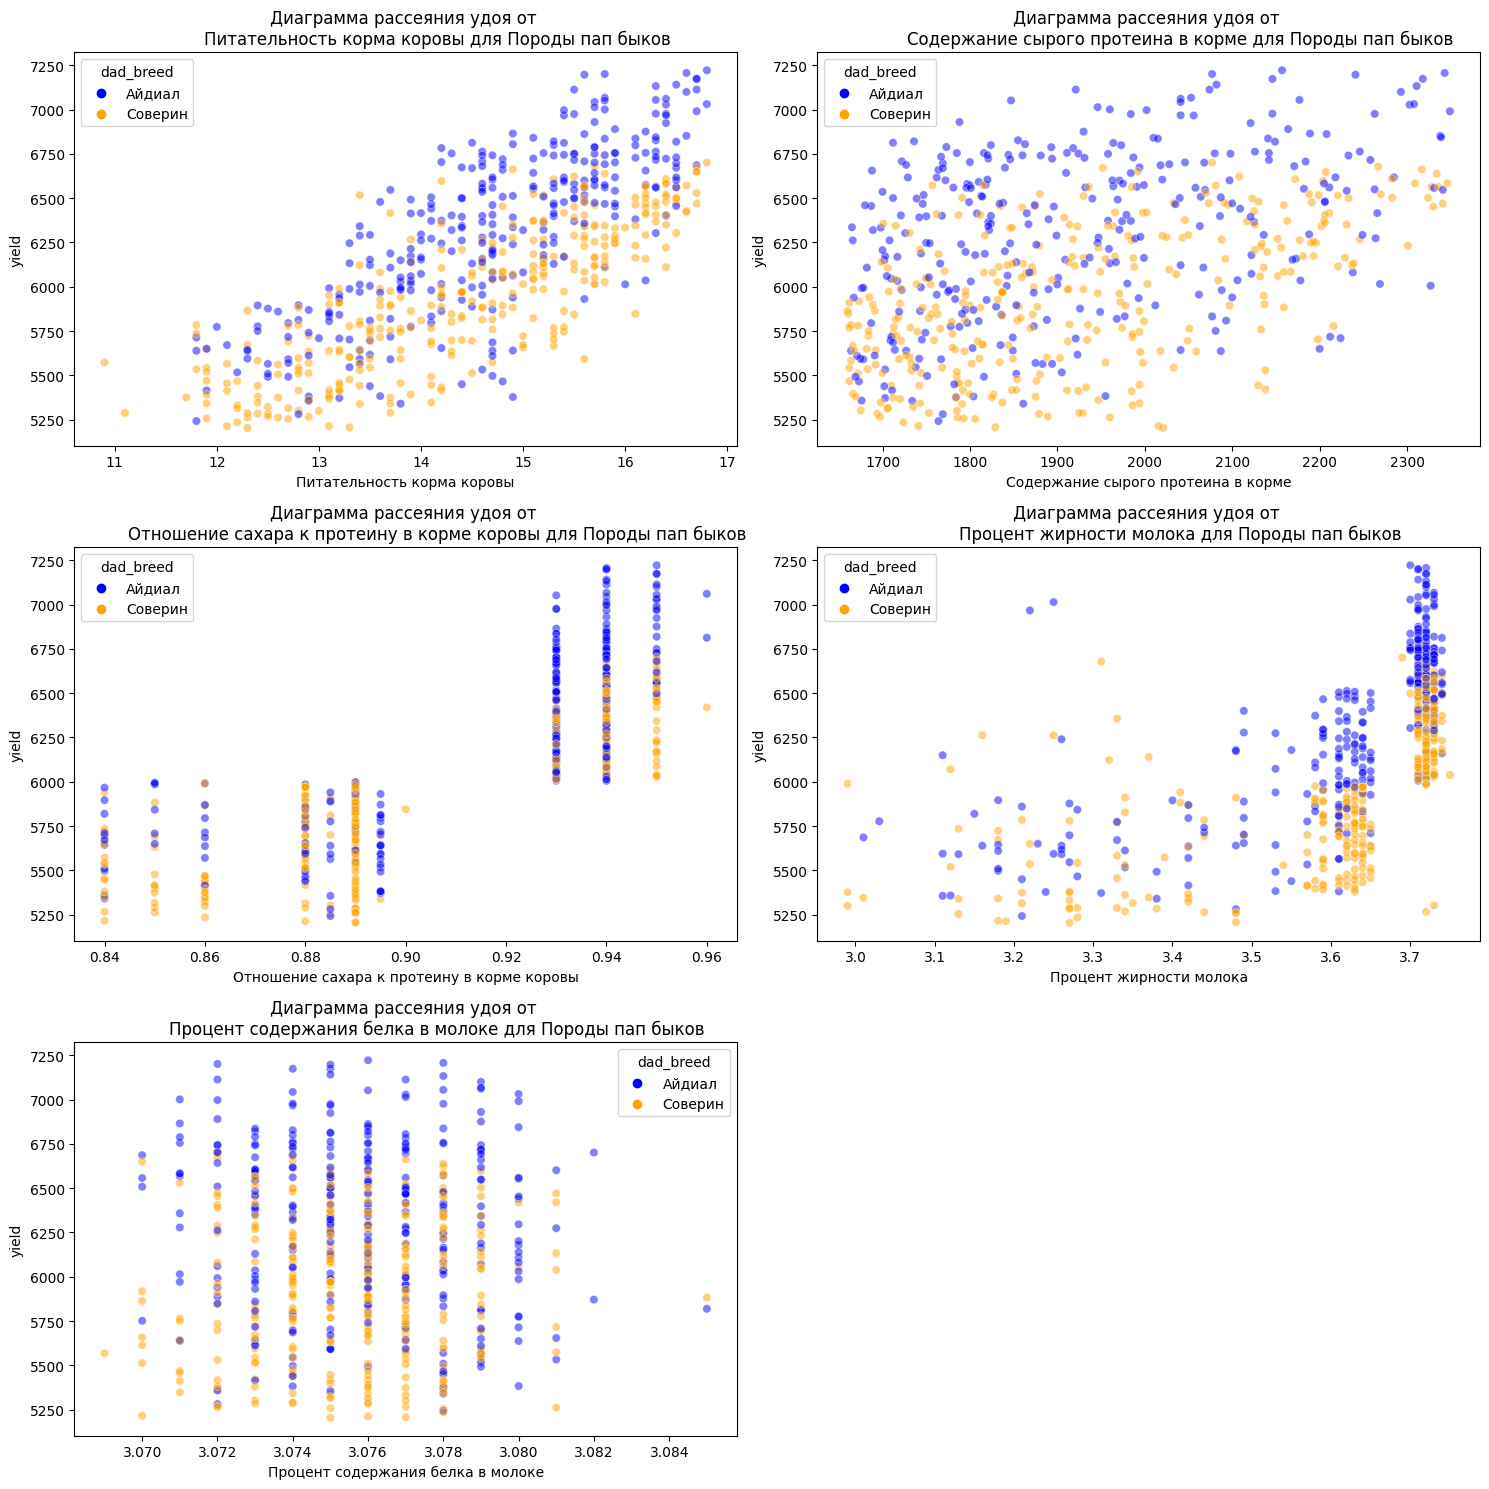

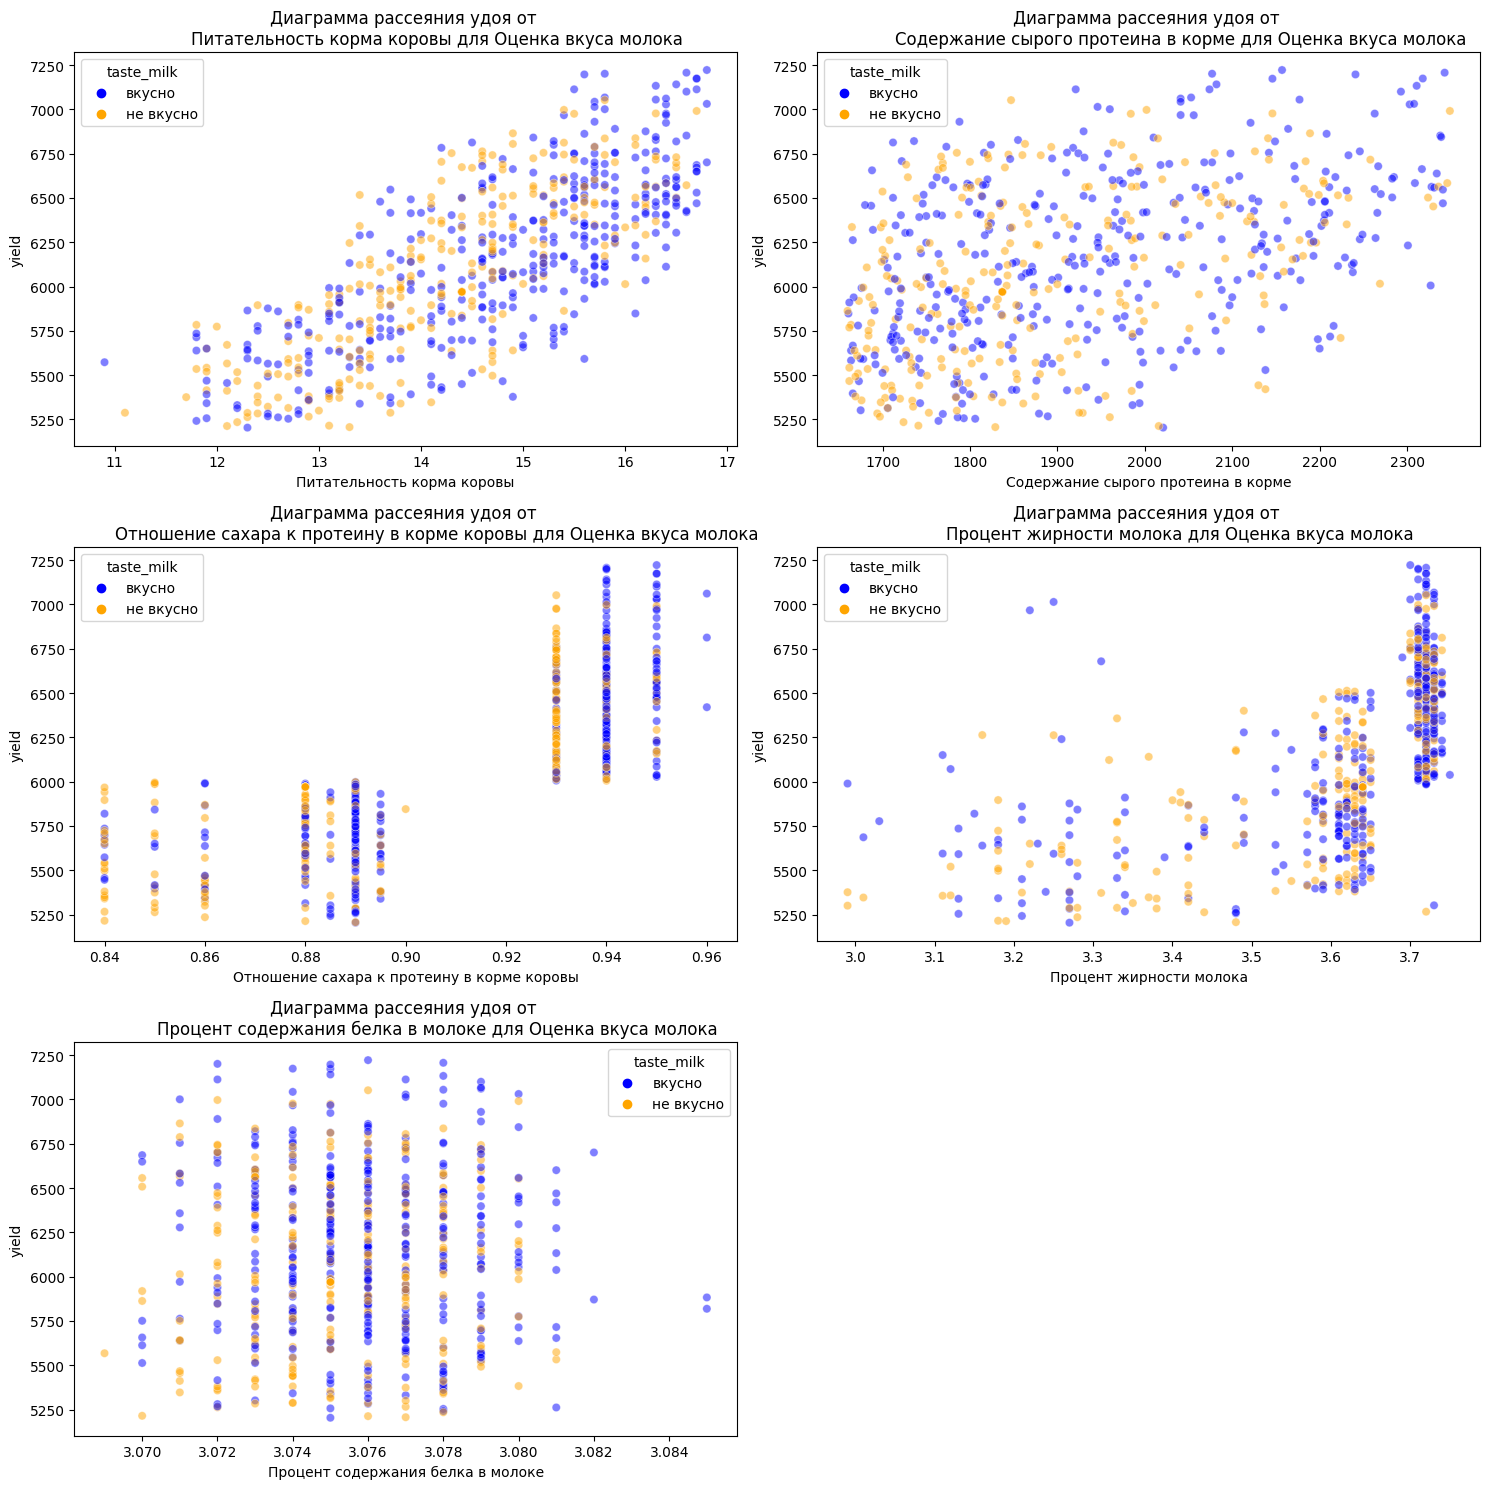

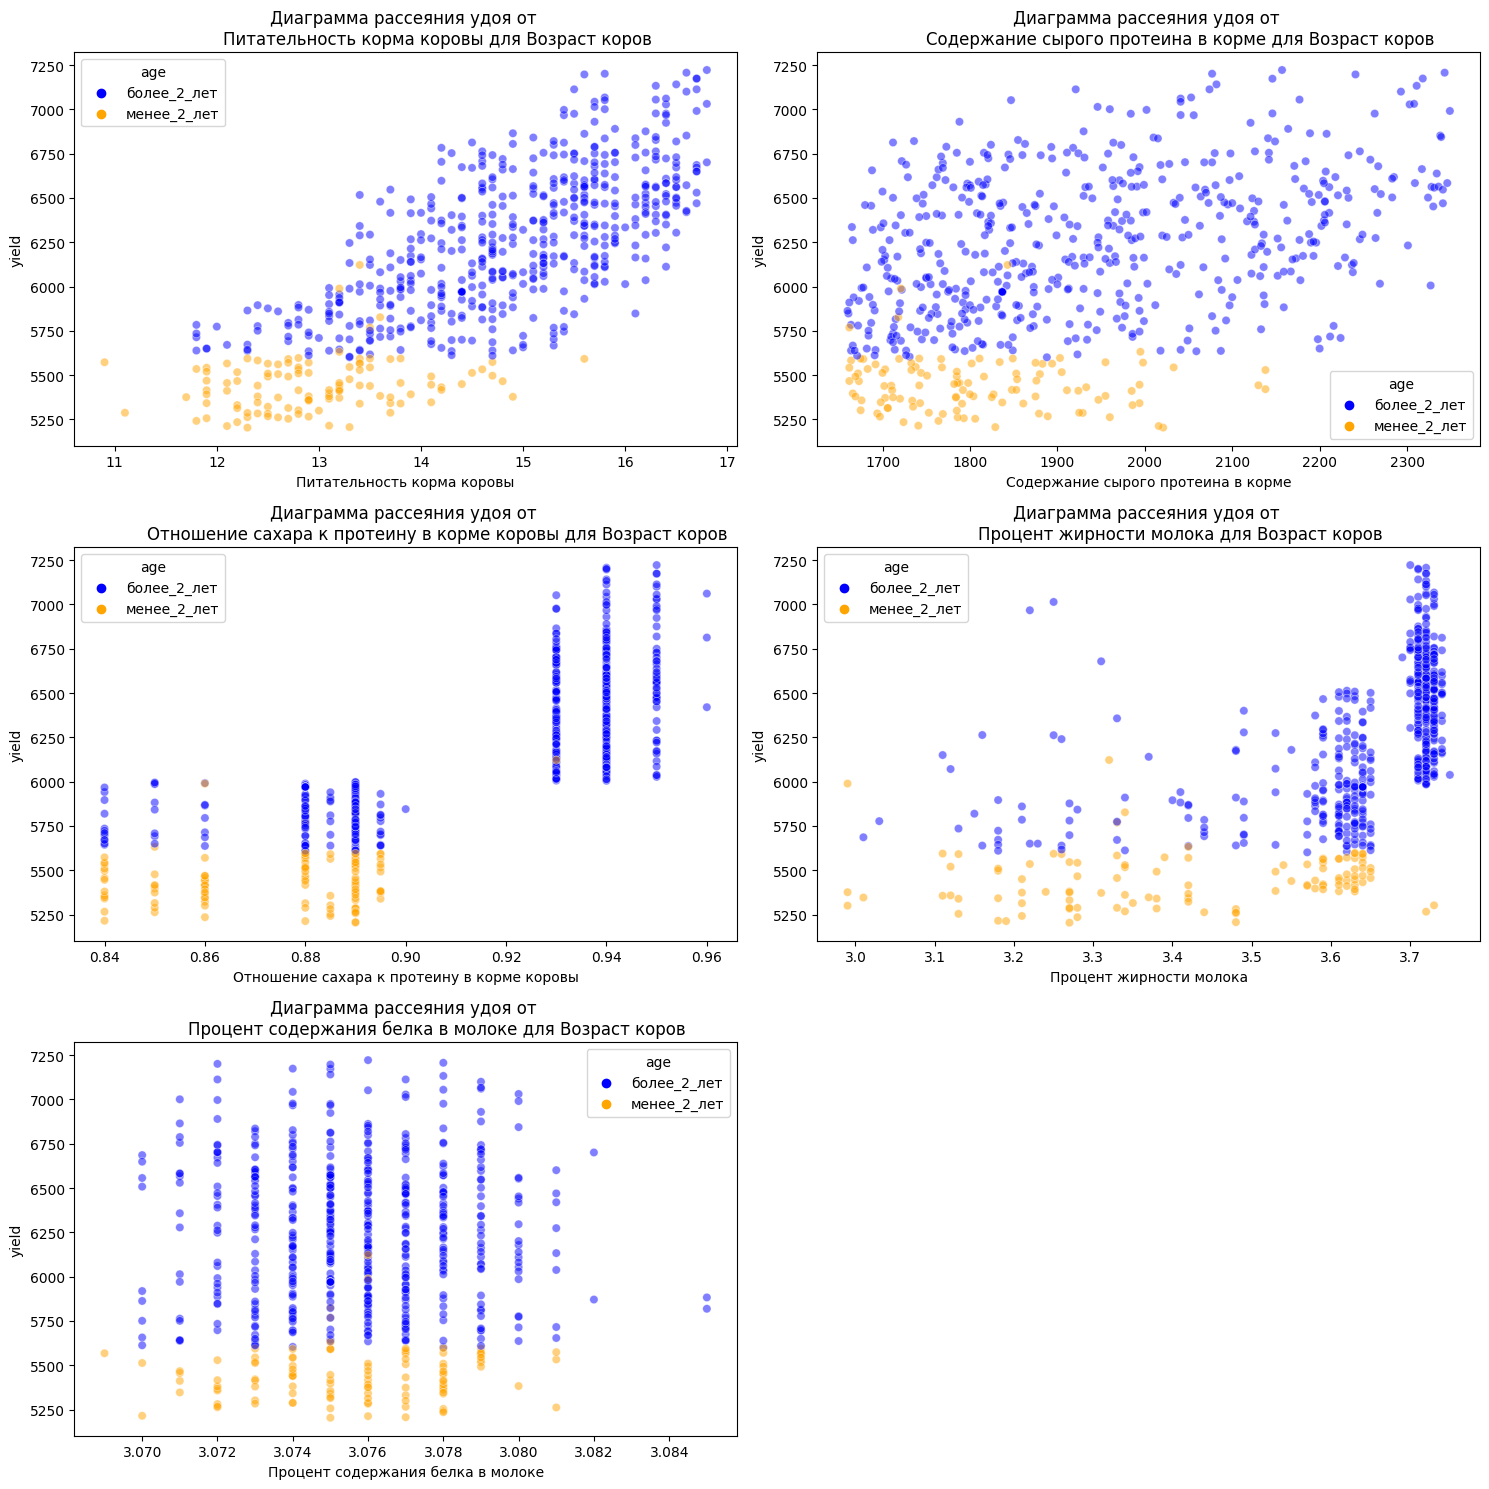

In [ ]:
dictionary_main_num = {
    'efu': 'Питательность корма коровы',
    'raw_protein': 'Содержание сырого протеина в корме',
    'spr': 'Отношение сахара к протеину в корме коровы',
    'fat_content': 'Процент жирности молока',
    'protein': 'Процент содержания белка в молоке'
}

 
dictionary_main_cat = {
    'breed': 'Породы коров фермера',
    'type_pasture': 'Типы пастбищ',
    'dad_breed': 'Породы пап быков',
    'taste_milk': 'Оценка вкуса молока',
    'age': 'Возраст коров'
}

# Построение диаграмм рассеяния для каждой категориальной переменной
for cat_key, cat_description in dictionary_main_cat.items():
    plt.figure(figsize=(15, 15))
    
    # Определим количество строк и столбцов в сетке
    rows = 3
    cols = 2
    
    for i, (feature_key, feature_description) in enumerate(dictionary_main_num.items(), 1):
        plt.subplot(rows, cols, i)
        sns.scatterplot(data=df_main, x=feature_key, y='yield', hue=cat_key, palette=['blue', 'orange'], alpha=0.5)
        plt.title(
            f'''Диаграмма рассеяния удоя от 
            {feature_description} для {cat_description}''')
        plt.xlabel(feature_description)
        plt.ylabel('yield')
        
        
    # Вывод разделителя
    print('=' * term_size.columns)
    plt.tight_layout()
    plt.show()

**Общий вывод по корреляционному анализу**

*Целевой признак - `yield`*

- Яркие нелинейные связи не выявлены, в связи с этим **добавление новых признаков - не требуется**. Но для признака `spr` наблюдается нелинейнейная связь;
- `age` имеет очень высокую взаимосвязь с целевым признаком;
- `dad_breed` имеет среднюю связь с целевым признаком;
- `spr` сильно зависит от целевого признака - высокий коэффициент корреляции. В особенности видна резкая тенденция возвышения значений после. Связь похожа не нелинейную, но есть спорный момент с переходом в значении `spr = 0.91`;
- Наблюдается отсутствие зависимости `yield` с `protein` — содержанием белков в молоке, вне зависимости от категориального признака;
- Наблюдается слабая связь `yield` с категориальными признаками: содержанием сырого протеина в корме (`raw_protein`), породой (`breed`), типом пастбища (`type_pasture`), вкусом молока (`taste_milk`);
- Мультиколлинеарность **отсутствует**: корреляционная матрица показала, что между некоторыми входными признаками есть умеренная корреляция, но нет явных признаков сильной мультиколлинеарности, с которой стоило бы справляться.

<a class="anchor" id="5-bullet"></a>
## 5. Задача регрессии

**Подготовка порядка наименнования колонок для обучения модели, которая будет совпадать с той которую просит предсказать заказчик**

In [ ]:
new_order = [
    'breed',
    'type_pasture',
    'dad_breed',
    'age',
    'efu',
    'raw_protein',
    'spr',
    'yield'
]

<a class="anchor" id="5.1-bullet"></a>
### 5.1 Модель №1

#### 5.1.1 Подготовка признаков

- Из всех признаков явно можно избавиться от признака `protein` и `taste_milk`. С ним связь целевого признака, фактически, отсутствует + абсолютно нелинейна;
- Признак `id` для обучения моделей не нужен, т.к. не несет никакой смысловой нагрузки.

In [ ]:
main_ml = df_main.copy()
main_ml = main_ml.drop(['id', 'protein', 'fat_content', 'taste_milk'], axis=1)
main_ml = main_ml[new_order]
main_ml.sample(5)

breed type_pasture dad_breed          age   efu  raw_protein  \
140    Вис Бик Айдиал    Холмистое   Соверин  менее_2_лет  13.1         1666   
326  Рефлешн Соверинг    Равнинное   Соверин  более_2_лет  15.0         1780   
564    Вис Бик Айдиал    Равнинное   Соверин  менее_2_лет  11.9         1662   
475  Рефлешн Соверинг    Равнинное    Айдиал  более_2_лет  13.2         1921   
41     Вис Бик Айдиал    Холмистое    Айдиал  более_2_лет  15.5         1797   

      spr  yield  
140  0.85   5397  
326  0.89   5657  
564  0.84   5542  
475  0.85   5708  
41   0.93   6581

#### 5.1.2 Разбиение выборки

In [ ]:
RANDOM_STATE = 42

X = main_ml.drop('yield', axis=1)
y = main_ml['yield']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

# Сохраним полную тренировочную выборку
X_train_full_1 = pd.concat([X_train, X_test], ignore_index=True)
y_train_full_1 = pd.concat([y_train, y_test], ignore_index=True)

# Соотношение тренировочной к тестовой выборке
print(f"Для входных признаков {X_train.shape} : {X_test.shape}")
print(f"Для целевого признаков {y_train.shape} : {y_test.shape}")

Для входных признаков (474, 7) : (159, 7)
Для целевого признаков (474,) : (159,)


#### 5.1.3 Кодировка и обучение модели

In [ ]:
# Разделяем признаки на категориальные и количественные
cat_col_names = ['breed', 'type_pasture', 'dad_breed', 'age']
num_col_names = ['efu', 'spr', 'raw_protein']

# подготовка признаков (масштабирование и кодирование)
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# обучение модели и получение предсказаний
model_lr_1 = LinearRegression()
model_lr_1.fit(X_train, y_train)

y_pred_1 = model_lr_1.predict(X_test)

#### 5.1.4 Анализ метрики модели

In [ ]:
r2_1 = r2_score(y_test, y_pred_1)
mse_1 = mean_squared_error(y_test, y_pred_1)
rmse_1 = root_mean_squared_error(y_test, y_pred_1)
mae_1 = mean_absolute_error(y_test, y_pred_1)
print(f'R2_score 1-й модели: {r2_1:.4f}')

R2_score 1-й модели: 0.7527


#### 5.1.5 Анализ остатков

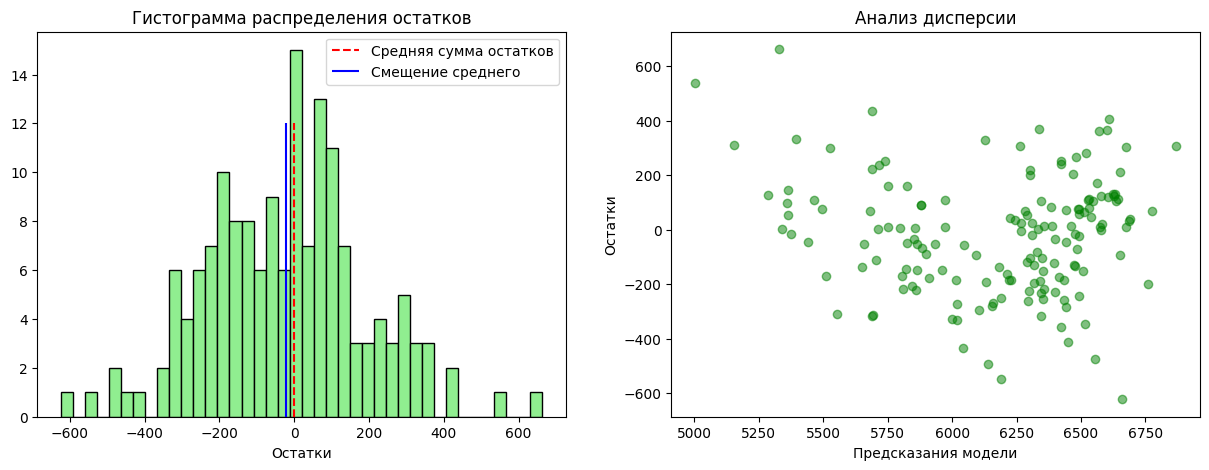

In [ ]:
# Выделяем остатки
residuals_1 = y_test - y_pred_1

# построение гистограммы распределения остатков
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axes[0].hist(residuals_1, bins=40, color='lightgreen', edgecolor='black')
zero = axes[0].vlines(
    x=0,
    colors='red',
    ymin=0,
    ymax=12,
    linestyles='--',
    label='Средняя сумма остатков'
)
median = axes[0].vlines(
    x=residuals_1.mean(),
    colors='blue',
    ymin=0,
    ymax=12,
    label='Смещение среднего'
)
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# Строим график дисперсии
axes[1].scatter(x=y_pred_1, y=residuals_1, color='green', alpha=0.5)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Изученные свойства остатков во время анализа первой модели и основные выводы:**

- *Случайность:* остатки распределены бимодально. Смещение медианы предсказаний минимально;
- *Устойчивость:* остатки имеют до 6000 - один уровень разброса. Более 6000 - разброс ошибки выше. Однозначно модель использовать нельзя - наблюдается гетероскедастичность (не постоянство дисперсии) ;
- `r2_score` первой модели = `0.7527`;

Модель нуждается в улучшении, факторы `spr` и `efu` имеют не линейную связь с целевым параметром.

<a class="anchor" id="5.2-bullet"></a>
### 5.2 Модель №2

#### 5.2.1 Подготовка признаков

In [ ]:
main_ml_2 = main_ml.copy()
main_ml_2['spr'] = main_ml['spr'].apply(lambda x: 'более_0.91' if x >= 0.91 else 'менее_0.91')
main_ml_2['efu_square'] = main_ml['efu']**2
main_ml_2 = main_ml_2.drop(['efu'], axis=1)

In [ ]:
new_order = [
    'breed',
    'type_pasture',
    'dad_breed',
    'age',
    'efu_square',
    'raw_protein',
    'spr',
    'yield'
]

main_ml_2 = main_ml_2[new_order]
main_ml_2.sample(5)

breed type_pasture dad_breed          age  efu_square  \
231    Вис Бик Айдиал    Холмистое   Соверин  менее_2_лет      148.84   
432  Рефлешн Соверинг    Холмистое   Соверин  более_2_лет      240.25   
120    Вис Бик Айдиал    Равнинное   Соверин  более_2_лет      139.24   
284  Рефлешн Соверинг    Холмистое   Соверин  более_2_лет      139.24   
64   Рефлешн Соверинг    Холмистое    Айдиал  более_2_лет      265.69   

     raw_protein         spr  yield  
231         1986  менее_0.91   5331  
432         1908  более_0.91   6390  
120         1664  менее_0.91   5784  
284         1712  менее_0.91   5735  
64          2058  более_0.91   6559

#### 5.2.2 Рабиение выборки

In [ ]:
X = main_ml_2.drop('yield', axis=1)
y = main_ml_2['yield']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

X_train_full_2 = pd.concat([X_train, X_test], ignore_index=True)
y_train_full_2 = pd.concat([y_train, y_test], ignore_index=True)

# Соотношение тренировочной к тестовой выборке
print(f"Для входных признаков {X_train.shape} : {X_test.shape}")
print(f"Для целевого признаков {y_train.shape} : {y_test.shape}")

Для входных признаков (474, 7) : (159, 7)
Для целевого признаков (474,) : (159,)


#### 5.2.3 Кодировка и обучение модели

In [ ]:
# Разделяем признаки на категориальные и количественные
cat_col_names = ['breed', 'type_pasture', 'dad_breed', 'age', 'spr']
num_col_names = ['efu_square', 'raw_protein']

# подготовка признаков (масштабирование и кодирование)
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# обучение модели и получение предсказаний
model_lr_2 = LinearRegression()
model_lr_2.fit(X_train, y_train)

y_pred_2 = model_lr_2.predict(X_test)

#### 5.2.4 Анализ метрики модели

In [ ]:
r2_2 = r2_score(y_test, y_pred_2)
mse_2 = mean_squared_error(y_test, y_pred_2)
rmse_2 = root_mean_squared_error(y_test, y_pred_2)
mae_2 = mean_absolute_error(y_test, y_pred_2)
print(f'R2_score 2-й модели: {r2_2:.4f}')

R2_score 2-й модели: 0.7904


#### 5.2.5 Анализ остатков

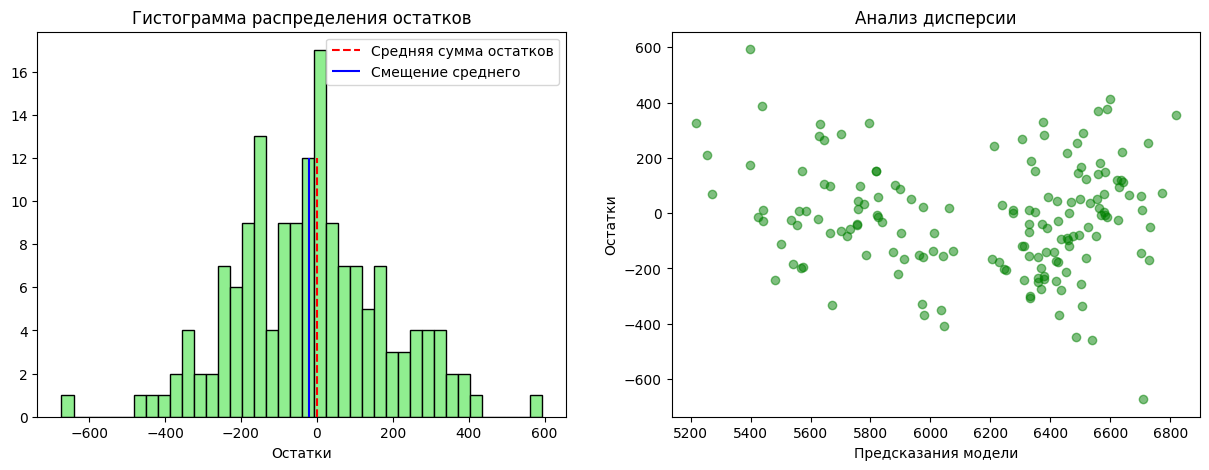

In [ ]:
# Выделяем остатки
residuals_2 = y_test - y_pred_2

# построение гистограммы распределения остатков
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axes[0].hist(residuals_2, bins=40, color='lightgreen', edgecolor='black')
zero = axes[0].vlines(
    x=0,
    colors='red',
    ymin=0,
    ymax=12,
    linestyles='--',
    label='Средняя сумма остатков'
)
median = axes[0].vlines(
    x=residuals_2.mean(),
    colors='blue',
    ymin=0,
    ymax=12,
    label='Смещение среднего'
)
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# Строим график дисперсии
axes[1].scatter(x=y_pred_2, y=residuals_2, color='green', alpha=0.5)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Изученные свойства остатков во время анализа второй модели и основные выводы:**

- *Случайность:* остатки бимодально распределены, график — смещен относительно среднего влево от нуля.
- *Устойчивость:* дисперсия остатков стала стабильнее.
- `r2_score` второй модели = `0.7904` (метрика увеличилась по сравнению с 1 моделью)

Данную модель можно использовать для прогназирования.

<a class="anchor" id="5.3-bullet"></a>
### 5.3 Модель №3

#### 5.3.1 Подготовка признаков

In [ ]:
print(f"Размерность {df_main.shape} до слияния")
main_ml_3 = df_main.merge(df_dad, on='id')
print(f"Размерность {main_ml_3.shape} после слияния")
main_ml_3['spr'] = main_ml_3['spr'].apply(lambda x: 'более_0.91' if x >= 0.91 else 'менее_0.91')
main_ml_3['efu_square'] = main_ml_3['efu'] ** 2
main_ml_3 = main_ml_3.drop(['id', 'protein', 'efu', 'fat_content', 'taste_milk'], axis=1)
main_ml_3.sample(5)

Размерность (633, 12) до слияния
Размерность (633, 13) после слияния


yield  raw_protein         spr             breed type_pasture dad_breed  \
255   5287         1929  менее_0.91  Рефлешн Соверинг    Равнинное   Соверин   
464   6977         2146  более_0.91  Рефлешн Соверинг    Холмистое    Айдиал   
470   5883         2159  менее_0.91    Вис Бик Айдиал    Равнинное   Соверин   
153   6763         2126  более_0.91    Вис Бик Айдиал    Холмистое    Айдиал   
133   6162         1987  более_0.91    Вис Бик Айдиал    Холмистое   Соверин   

             age  dad_name  efu_square  
255  менее_2_лет     Барин      151.29  
464  более_2_лет  Геркулес      265.69  
470  более_2_лет  Соловчик      222.01  
153  более_2_лет    Буйный      213.16  
133  более_2_лет     Барин      246.49

In [ ]:
new_order = [
    'breed',
    'type_pasture',
    'dad_breed',
    'dad_name',
    'age',
    'efu_square',
    'raw_protein',
    'spr',
    'yield'
]

main_ml_3 = main_ml_3[new_order]
main_ml_3.sample(5)

breed type_pasture dad_breed  dad_name          age  \
396  Рефлешн Соверинг    Холмистое   Соверин     Барин  менее_2_лет   
323  Рефлешн Соверинг    Холмистое   Соверин     Барин  менее_2_лет   
386    Вис Бик Айдиал    Равнинное   Соверин  Соловчик  более_2_лет   
370  Рефлешн Соверинг    Равнинное    Айдиал  Геркулес  более_2_лет   
221    Вис Бик Айдиал    Равнинное   Соверин  Соловчик  менее_2_лет   

     efu_square  raw_protein         spr  yield  
396      176.89         1829  менее_0.91   5207  
323      243.36         1719  менее_0.91   5592  
386      268.96         2126  более_0.91   6350  
370      237.16         1810  более_0.91   6592  
221      166.41         1998  менее_0.91   5571

#### 5.3.2 Рабиение выборки

In [ ]:
X = main_ml_3.drop('yield', axis=1)
y = main_ml_3['yield']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

X_train_full_3 = pd.concat([X_train, X_test], ignore_index=True)
y_train_full_3 = pd.concat([y_train, y_test], ignore_index=True)

# Соотношение тренировочной к тестовой выборке
print(f"Для входных признаков {X_train.shape} : {X_test.shape}")
print(f"Для целевого признаков {y_train.shape} : {y_test.shape}")

Для входных признаков (474, 8) : (159, 8)
Для целевого признаков (474,) : (159,)


#### 5.3.3 Кодировка и обучение модели

In [ ]:
# Разделяем признаки на категориальные и количественные
cat_col_names = ['breed', 'type_pasture', 'dad_breed', 'age', 'dad_name', 'spr']
num_col_names = ['efu_square', 'raw_protein']

# подготовка признаков (масштабирование и кодирование)
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# обучение модели и получение предсказаний
model_lr_3 = LinearRegression()
model_lr_3.fit(X_train, y_train)

y_pred_3 = model_lr_3.predict(X_test)

#### 5.3.4 Анализ метрики модели

In [ ]:
r2_3 = r2_score(y_test, y_pred_3)
mse_3 = mean_squared_error(y_test, y_pred_3)
rmse_3 = root_mean_squared_error(y_test, y_pred_3)
mae_3 = mean_absolute_error(y_test, y_pred_3)
print(f'R2_score 3-й модели: {r2_3:.4f}')

R2_score 3-й модели: 0.8024


#### 5.3.5 Анализ остатков

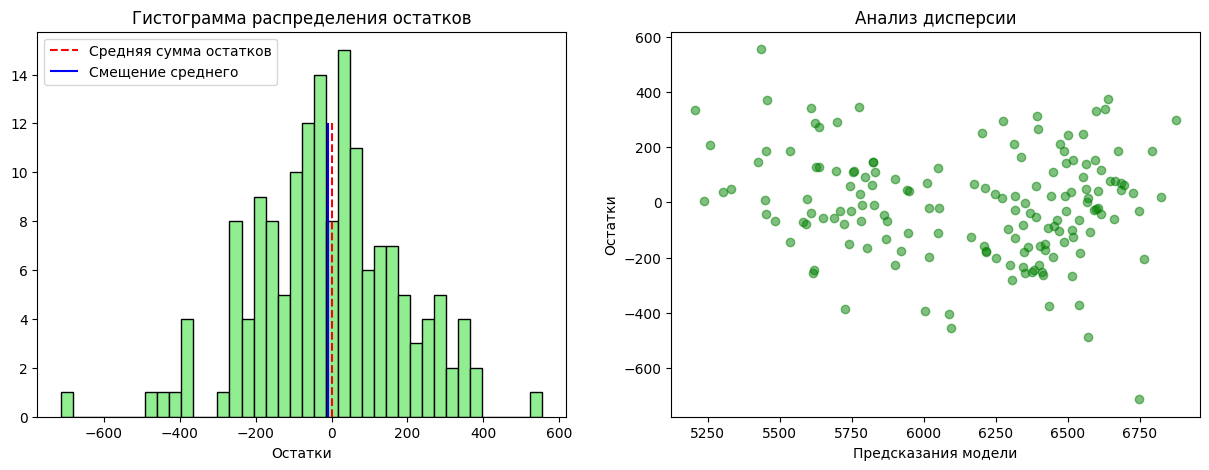

In [ ]:
# Выделяем остатки
residuals_3 = y_test - y_pred_3

# построение гистограммы распределения остатков
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axes[0].hist(residuals_3, bins=40, color='lightgreen', edgecolor='black')
zero = axes[0].vlines(
    x=0,
    colors='red',
    ymin=0,
    ymax=12,
    linestyles='--',
    label='Средняя сумма остатков'
)
median = axes[0].vlines(
    x=residuals_3.mean(),
    colors='blue',
    ymin=0,
    ymax=12,
    label='Смещение среднего'
)
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# Строим график дисперсии
axes[1].scatter(x=y_pred_3, y=residuals_3, color='green', alpha=0.5)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Изученные свойства остатков во время анализа третьей модели и основные выводы:**

- *Случайность:* остатки имеют наиболее приближенное к нормальному распределение по сравнения с предыдущими моделями, график — смещен относительно среднего влево от нуля.
- *Устойчивость:* дисперсия остатков - гомоскедастична. (Устойчивость модели наибольшая);
- `r2_score` третьей модели = `0.8024` (метрика наибольшая - наилучший результат).

Потенциал для улучшения модели всё ещё есть, но на текущий момент признаём модель качественной (остатки гомоскедастичны) и пригодной для работы. Посмотрим на точность модели

<a class="anchor" id="5.4-bullet"></a>
### 5.4 Сравнение моделей

In [ ]:
# Сравнение r2_score
scores_compared = {'первой': r2_1, 'второй': r2_2, 'третьей': r2_3}
for k, v in scores_compared.items():
    print(f'R2_score {k} модели: {v:.4f}')
print('=' * term_size.columns)

# Сравнение остатков
residuals_compared = {'первой': residuals_1, 'второй': residuals_2, 'третьей': residuals_3}
for k, v in residuals_compared.items():
    print(f'Среднее значение остатков {k} модели: {v.mean():.4f}')

R2_score первой модели: 0.7527
R2_score второй модели: 0.7904
R2_score третьей модели: 0.8024
Среднее значение остатков первой модели: -22.1920
Среднее значение остатков второй модели: -19.6099
Среднее значение остатков третьей модели: -9.6107


- На данном этапе **третья модель** показывает наилучшее значение `r2_score` = `0.8024`
- И наименьшее среднее значение остатков: `-9.6107`

<a class="anchor" id="5.5-bullet"></a>
### 5.5 Качество каждой модели по трём метрикам: MSE, MAE, RMSE

In [ ]:
compare_metrics = pd.DataFrame({
    '': ['mse', 'rmse', 'mae'],
    'model_1': [mse_1, rmse_1, mae_1],
    'model_2': [mse_2, rmse_2, mae_2],
    'model_3': [mse_3, rmse_3, mae_3],
})

compare_metrics

model_1       model_2       model_3
0   mse  46380.332040  39310.354591  37065.528585
1  rmse    215.360934    198.268390    192.524099
2   mae    169.068719    153.907277    148.842322

In [ ]:
# Посчитаем 95% доверительный интервал лучшей модели 
interval = st.norm.interval(
    alpha=0.95,
    loc=np.mean(y_pred_3),
    scale=st.sem(y_pred_3)
)

print(f"95% доверительный интервал модели: {interval[0]:.0f} - {interval[1]:.0f}")

95% доверительный интервал модели: 6096 - 6226


**Вывод по качеству трех моделей:**

- Лучшая модель - **третья**.
    - `MAE` - 148.84 кг
    - `MSE` - 37066 $кг^2$
    - `RMSE` - 192.84 кг

- **95% доверительный интервал** лучшей модели = `(6096 - 6226)`

<a class="anchor" id="5.6-bullet"></a>
### 5.6 Финальная модель

In [ ]:
# Создаем копию датасета
cow_ml = df_cow.copy()

# Считаем среднее значение каждого недостающего признака и увеличиваем их на 5%
mean_values = df_main[['efu', 'raw_protein', 'spr']].mean()
new_values = mean_values * 1.05

# Добавляем недостающие признаки в датасет cow_ml и преобразовываем их
cow_ml['efu'] = new_values['efu']
cow_ml['efu_square'] = cow_ml['efu'] ** 2
cow_ml['raw_protein'] = new_values['raw_protein']
cow_ml['spr'] = new_values['spr']
cow_ml['spr'] = cow_ml['spr'].apply(lambda x: 'более_0.91' if x >= 0.91 else 'менее_0.91')

# Создаем датафрейм cow_ml_final 
cow_ml_final = cow_ml.drop(['protein', 'efu', 'fat_content'], axis=1)

# Проверка на идентичность названия столбцов
display(cow_ml_final.sample(5))
display(X_train_full_3.sample(5))

breed type_pasture dad_breed  dad_name          age  \
12    Вис Бик Айдиал    Холмистое    Айдиал  Геркулес  более_2_лет   
3   Рефлешн Соверинг    Холмистое    Айдиал    Буйный  более_2_лет   
5   Рефлешн Соверинг    Равнинное   Соверин  Геркулес  менее_2_лет   
13    Вис Бик Айдиал    Холмистое   Соверин     Барин  менее_2_лет   
0     Вис Бик Айдиал    Холмистое    Айдиал  Геркулес  более_2_лет   

    efu_square  raw_protein         spr  
12  233.323453  2019.227962  более_0.91  
3   233.323453  2019.227962  более_0.91  
5   233.323453  2019.227962  более_0.91  
13  233.323453  2019.227962  более_0.91  
0   233.323453  2019.227962  более_0.91

breed type_pasture dad_breed  dad_name          age  \
400  Рефлешн Соверинг    Холмистое   Соверин     Барин  более_2_лет   
181  Рефлешн Соверинг    Равнинное    Айдиал    Буйный  более_2_лет   
373    Вис Бик Айдиал    Холмистое    Айдиал    Буйный  более_2_лет   
281  Рефлешн Соверинг    Равнинное   Соверин  Соловчик  менее_2_лет   
618  Рефлешн Соверинг    Холмистое    Айдиал     Барин  более_2_лет   

     efu_square  raw_protein         spr  
400      187.69         1945  менее_0.91  
181      166.41         1691  менее_0.91  
373      275.56         2343  более_0.91  
281      136.89         1825  менее_0.91  
618      193.21         1703  более_0.91

In [ ]:
# Разделяем признаки на категориальные и количественные
cat_col_names = ['breed', 'type_pasture', 'dad_breed', 'age', 'dad_name', 'spr']
num_col_names = ['efu_square', 'raw_protein']

# Кодируем категориальные признаки
X_train_ohe = encoder.transform(X_train_full_3[cat_col_names])
X_test_ohe = encoder.transform(cow_ml_final[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

# Масштабируем количественные признаки
X_train_scaled = scaler.transform(X_train_full_3[num_col_names])
X_test_scaled = scaler.transform(cow_ml_final[num_col_names])

# Собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_full = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# получение предсказаний
y_pred = model_lr_3.predict(X_test_full)

In [ ]:
cow_ml['predicted_yield'] = y_pred.round(0)
cow_ml.reset_index(inplace=True, drop=True)

In [ ]:
cow_ml.query('predicted_yield >= 6000')

breed type_pasture dad_breed  dad_name  fat_content  protein  \
0     Вис Бик Айдиал    Холмистое    Айдиал  Геркулес         3.58    3.076   
1     Вис Бик Айдиал    Равнинное   Соверин    Буйный         3.54    3.081   
2   Рефлешн Соверинг    Равнинное   Соверин     Барин         3.59    3.074   
3   Рефлешн Соверинг    Холмистое    Айдиал    Буйный         3.40    3.061   
4   Рефлешн Соверинг    Равнинное    Айдиал    Буйный         3.64    3.074   
5   Рефлешн Соверинг    Равнинное   Соверин  Геркулес         3.63    3.053   
6     Вис Бик Айдиал    Холмистое    Айдиал  Геркулес         3.58    3.076   
7     Вис Бик Айдиал    Равнинное   Соверин    Буйный         3.57    3.079   
8   Рефлешн Соверинг    Равнинное   Соверин     Барин         3.59    3.074   
9   Рефлешн Соверинг    Холмистое    Айдиал    Буйный         3.40    3.079   
10    Вис Бик Айдиал    Холмистое   Соверин  Соловчик         3.73    3.055   
11  Рефлешн Соверинг    Равнинное   Соверин  Геркулес         3.73    3.073   
12    Вис Бик Айдиал    Холмистое    Айдиал  Геркулес         3.68    3.046   
13    Вис Бик Айдиал    Холмистое   Соверин     Барин         3.42    3.075   
14  Рефлешн Соверинг    Равнинное   Соверин     Барин         3.59    3.074   
15  Рефлешн Соверинг    Холмистое    Айдиал    Буйный         3.40    3.065   
16    Вис Бик Айдиал    Холмистое   Соверин  Соловчик         3.73    3.079   
17  Рефлешн Соверинг    Равнинное   Соверин  Геркулес         3.77    3.053   
18    Вис Бик Айдиал    Равнинное   Соверин    Буйный         3.34    3.069   
19  Рефлешн Соверинг    Равнинное    Айдиал    Буйный         3.64    3.074   

            age        efu  efu_square  raw_protein         spr  \
0   более_2_лет  15.274929  233.323453  2019.227962  более_0.91   
1   менее_2_лет  15.274929  233.323453  2019.227962  более_0.91   
2   более_2_лет  15.274929  233.323453  2019.227962  более_0.91   
3   более_2_лет  15.274929  233.323453  2019.227962  более_0.91   
4   более_2_лет  15.274929  233.323453  2019.227962  более_0.91   
5   менее_2_лет  15.274929  233.323453  2019.227962  более_0.91   
6   более_2_лет  15.274929  233.323453  2019.227962  более_0.91   
7   более_2_лет  15.274929  233.323453  2019.227962  более_0.91   
8   более_2_лет  15.274929  233.323453  2019.227962  более_0.91   
9   менее_2_лет  15.274929  233.323453  2019.227962  более_0.91   
10  более_2_лет  15.274929  233.323453  2019.227962  более_0.91   
11  более_2_лет  15.274929  233.323453  2019.227962  более_0.91   
12  более_2_лет  15.274929  233.323453  2019.227962  более_0.91   
13  менее_2_лет  15.274929  233.323453  2019.227962  более_0.91   
14  более_2_лет  15.274929  233.323453  2019.227962  более_0.91   
15  более_2_лет  15.274929  233.323453  2019.227962  более_0.91   
16  более_2_лет  15.274929  233.323453  2019.227962  более_0.91   
17  менее_2_лет  15.274929  233.323453  2019.227962  более_0.91   
18  более_2_лет  15.274929  233.323453  2019.227962  более_0.91   
19  более_2_лет  15.274929  233.323453  2019.227962  более_0.91   

    predicted_yield  
0            6601.0  
1            6350.0  
2            6289.0  
3            6604.0  
4            6552.0  
5            6388.0  
6            6601.0  
7            6570.0  
8            6289.0  
9            6384.0  
10           6344.0  
11           6608.0  
12           6601.0  
13           6102.0  
14           6289.0  
15           6604.0  
16           6344.0  
17           6388.0  
18           6570.0  
19           6552.0

**Вывод по моделям линейной регрессии:**

- Выявили лучшую модель из трех, показатели которой:
  - `MAE` - 148.84 кг
  - `MSE` - 37066 $кг^2$
  - `RMSE` - 192.84 кг
  - `R2_score` - 0.8024  
  
  
- Получили **95% доверительный интервал** лучшей модели = `(6096 - 6226)`   
- Получили предсказания по всем коровам, рассматриваемые фермером к покупке. 
- По условию задачи регрессии, можем на данном этапе рекомендовать фермеру для покупки **всех коров**. Каждая из них, вероятно, выдает `более 6000 кг удоя в год`, однако еще стоит предсказать, молоко каких коров будет вкусным.

<a class="anchor" id="6-bullet"></a>
## 6. Задача классификации

<a class="anchor" id="6.1-bullet"></a>
### 6.1 Обучение модели логистической регрессии

#### 6.1.1 Подготовка данных

In [ ]:
# Копия датафрейма df_main
ml_log = df_main.copy()
ml_log.head()

id  yield   efu  raw_protein    spr             breed type_pasture  \
0   1   5863  14.2         1743  0.890    Вис Бик Айдиал    Равнинное   
1   2   5529  12.8         2138  0.890    Вис Бик Айдиал    Равнинное   
2   3   5810  14.0         1854  0.885  Рефлешн Соверинг    Холмистое   
3   4   5895  12.4         2012  0.885  Рефлешн Соверинг    Холмистое   
4   5   5302  12.8         1675  0.885    Вис Бик Айдиал    Равнинное   

  dad_breed  fat_content  protein taste_milk          age  
0    Айдиал         3.58    3.076     вкусно  более_2_лет  
1   Соверин         3.54    3.079     вкусно  менее_2_лет  
2   Соверин         3.59    3.074  не вкусно  более_2_лет  
3    Айдиал         3.40    3.075  не вкусно  более_2_лет  
4   Соверин         3.73    3.073     вкусно  менее_2_лет

In [ ]:
# Подготовка признаков
ml_log['efu_square'] = ml_log['efu'] ** 2
ml_log['spr'] = ml_log['spr'].apply(lambda x: 'более_0.91' if x >= 0.91 else 'менее_0.91')

# Кодировка целевого признака
le = LabelEncoder()
ml_log['taste_milk'] = le.fit_transform(ml_log['taste_milk'])

display(ml_log['taste_milk'].unique())

ml_log = ml_log.drop(['id', 'yield', 'efu', 'protein'], axis=1)

ml_log.sample(5)

array([0, 1])

raw_protein         spr             breed type_pasture dad_breed  \
194         2074  более_0.91    Вис Бик Айдиал    Холмистое    Айдиал   
507         1975  более_0.91    Вис Бик Айдиал    Равнинное    Айдиал   
272         1930  менее_0.91  Рефлешн Соверинг    Холмистое   Соверин   
313         1824  более_0.91  Рефлешн Соверинг    Равнинное    Айдиал   
5           1806  менее_0.91  Рефлешн Соверинг    Холмистое   Соверин   

     fat_content  taste_milk          age  efu_square  
194         3.72           0  более_2_лет      240.25  
507         3.72           0  более_2_лет      213.16  
272         3.72           0  более_2_лет      231.04  
313         3.73           0  более_2_лет      243.36  
5           3.13           0  менее_2_лет      161.29

#### 6.1.2 Разбиение данных

In [ ]:
# Выделение признаков
X = ml_log.drop('taste_milk', axis=1)
y = ml_log['taste_milk']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
)

In [ ]:
# Заранее создадим объединенную тренировочную выборку
X_train_full = pd.concat([X_train, X_test], ignore_index=True)
y_train_full = pd.concat([y_train, y_test], ignore_index=True)

# Соотношение тренировочной к тестовой выборке
print(f"Для входных признаков {X_train.shape} : {X_test.shape}")
print(f"Для целевого признаков {y_train.shape} : {y_test.shape}")

Для входных признаков (474, 8) : (159, 8)
Для целевого признаков (474,) : (159,)


#### 6.1.3 Кодировка и масштабирование входных признаков

In [ ]:
# Разделяем признаки на категориальные и количественные
cat_col_names = ['breed', 'type_pasture', 'dad_breed', 'age', 'spr']
num_col_names = ['efu_square', 'raw_protein', 'fat_content']

# Кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

# Масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# Собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#### 6.1.4 Обучение модели логистической регрессии

In [ ]:
# обучение модели и получение предсказаний на тестовых данных
clf = LogisticRegression()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

**Влияние входного признака на целевой для модели логистической регрессии**

In [ ]:
# выводим веса коэффициентов
for feature_number, feature_name in enumerate(X.columns):
    exp_weight = math.exp(clf.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.2f}")

raw_protein         : +1.29
spr                 : +0.62
breed               : +1.24
type_pasture        : +0.93
dad_breed           : +0.48
fat_content         : +0.51
age                 : +0.81
efu_square          : +1.02


#### 6.1.5 Нахождение основных метрик качества модели

In [ ]:
clf_accuracy = accuracy_score(y_test, y_pred)
clf_recall = recall_score(y_test, y_pred)
clf_precision = precision_score(y_test, y_pred)

print(f'Accuracy: {clf_accuracy:.4f}')
print(f'Recall: {clf_recall:.4f}')
print(f'Precision: {clf_precision:.4f}')

Accuracy: 0.5975
Recall: 0.3231
Precision: 0.5122


#### 6.1.6 Построение матрицы ошибок

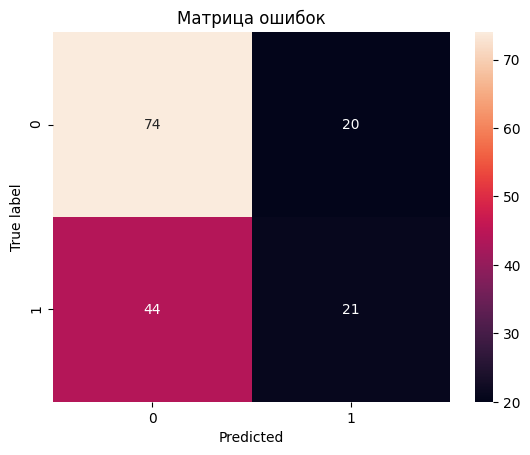

In [ ]:
# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Матрица ошибок')
plt.ylabel('True label')
plt.xlabel('Predicted');

**Вывод**
- `Accuracy = 0.5975` (Точность предсказания), что говорит о том, что логистическая модель работает лучше, чем случайная;
- `Recall = 0.3231` (На русском языке её называют полнотой. Она измеряет, смогла ли модель классификации присвоить класс *вкусное молоко* всем объектам этого класса) 
- Метрика `Precision = 0.5122` (показывает точность, с которой модель присваивает объектам класс *вкусное молоко*).
- Ошибок первого рода - 20.
- Ошибок второго рода - 44.

<a class="anchor" id="6.2-bullet"></a>
### 6.2 Анализ модели логистической регрессии

- **Ошибка первого рода** - критичнее всего при покупке коров, поскольку в таком случае мы рекомендуем фермеру приобрести коров с фактически *не вкусным* молоком. 

- `Recall:`
    - Ошибки второго рода - не критичны для нас, поскольку нет страшного в том, что мы не предложим фермеру несколько коров, у которых вкусное молоко. Гораздо хуже будет, если предложить не вкусное.  
- `Precision:`
    - Количество FP (ошибок первого рода) нужно сводить к минимуму, ибо они критичны. В таком случае можно сказать, что нам нужно максимизировать метрику `Precision`.

#### 6.2.1 Подбор порога класса

In [ ]:
# Выведем вероятности класса predict_proba() и правильные ответы
y_proba = clf.predict_proba(X_test)[:, 1]

proba_data = pd.DataFrame(zip(y_test, y_proba),
                          columns=['y_test', 'y_proba']).sort_values(by='y_proba', ascending=False)

proba_data.head()

y_test   y_proba
76        1  0.755549
118       1  0.721392
45        1  0.704711
57        1  0.689428
50        1  0.667972

In [ ]:
thresholds = [round(i, 2) for i in np.linspace(0.1, 1, num=100, endpoint=False)]
columns = []

for i in thresholds:
    columns.append('y_pred_' + str(i))
    proba_data['y_pred_' + str(i)] = proba_data['y_proba'].apply(lambda x: 1 if x > i else 0)

proba_data.head(5)

y_test   y_proba  y_pred_0.1  y_pred_0.11  y_pred_0.12  y_pred_0.13  \
76        1  0.755549           1            1            1            1   
118       1  0.721392           1            1            1            1   
45        1  0.704711           1            1            1            1   
57        1  0.689428           1            1            1            1   
50        1  0.667972           1            1            1            1   

     y_pred_0.14  y_pred_0.15  y_pred_0.16  y_pred_0.17  ...  y_pred_0.9  \
76             1            1            1            1  ...           0   
118            1            1            1            1  ...           0   
45             1            1            1            1  ...           0   
57             1            1            1            1  ...           0   
50             1            1            1            1  ...           0   

     y_pred_0.91  y_pred_0.92  y_pred_0.93  y_pred_0.94  y_pred_0.95  \
76             0            0            0            0            0   
118            0            0            0            0            0   
45             0            0            0            0            0   
57             0            0            0            0            0   
50             0            0            0            0            0   

     y_pred_0.96  y_pred_0.97  y_pred_0.98  y_pred_0.99  
76             0            0            0            0  
118            0            0            0            0  
45             0            0            0            0  
57             0            0            0            0  
50             0            0            0            0  

[5 rows x 92 columns]

In [ ]:
# Функция для расчета метрик
def threshold_choice(threshold_list, proba_df):
    result_list = []

    for threshold in threshold_list:
        column_name = f'y_pred_{threshold}'

        # Precision
        precision = precision_score(proba_df['y_test'], proba_df[column_name], zero_division=1).round(4)

        # Recall
        recall = recall_score(proba_df['y_test'], proba_df[column_name]).round(4)

        # Количество ложноположительных предсказаний (FP)
        false_positives = proba_df.loc[
            (proba_df[column_name] == 1) & (proba_df['y_test'] == 0)
        ].shape[0]

        # Добавляем результаты в список
        result_list.append({
            'порог': threshold,
            'precision': precision,
            'recall': recall,
            'количество_FP': false_positives,
        })

    # Конвертируем список в DataFrame
    result_df = pd.DataFrame(result_list)
    return result_df

In [ ]:
# Применение функции
result_porog = threshold_choice(thresholds, proba_data)
result_porog.query('количество_FP == 0').sort_values(by='порог').head(5)

порог  precision  recall  количество_FP
62   0.66        1.0  0.0769              0
63   0.67        1.0  0.0615              0
64   0.68        1.0  0.0615              0
65   0.68        1.0  0.0615              0
66   0.69        1.0  0.0462              0

In [ ]:
# Выделяем оптимальный порог
OPTIMAL_THRESHOLD = 0.66

# Применение порога к предсказанным вероятностям
y_pred_threshold = (y_proba > OPTIMAL_THRESHOLD).astype(int)

clf_accuracy_new = accuracy_score(y_test, y_pred_threshold)
clf_recall_new = recall_score(y_test, y_pred_threshold)
clf_precision_new = precision_score(y_test, y_pred_threshold)

print(f'Old Accuracy: {clf_accuracy:.4f}')
print(f'Old Recall: {clf_recall:.4f}')
print(f'Old Precision: {clf_precision:.4f}')
print('=' * term_size.columns)
print(f'New Accuracy: {clf_accuracy_new:.4f}')
print(f'New Recall: {clf_recall_new:.4f}')
print(f'New Precision: {clf_precision_new:.4f}')

Old Accuracy: 0.5975
Old Recall: 0.3231
Old Precision: 0.5122
New Accuracy: 0.6226
New Recall: 0.0769
New Precision: 1.0000


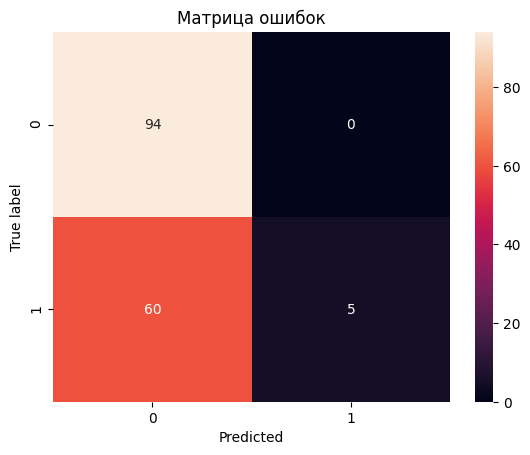

In [ ]:
# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred_threshold)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Матрица ошибок')
plt.ylabel('True label')
plt.xlabel('Predicted');

**Вывод:**

- В результате подбора порога = 0.66 для минимизации ошибок первого рода, когда логистическая модель делает предсказание, что молоко вкусное, а на самом деле оно им не является. Удалось полностью избавиться от этой ошибки о чем говорит количество метрика `precision == 1`.

- Изменения метрик `Accuracy`, `Recall`, `Precision` при изменении порога классификации:
    - `Accuracy` увеличилась с 0.5975 до 0.6226;
    - `Recall` уменьшилось с 0.3231 до 0.0769, ведь теперь модель должна быть абсолютно уверена, что присвоила класс *вкусное молоко* верно;
    - `Precision`увеличилась с 0.63 до 1.
    
- Последнее необходимое действие - создать новую тренировочную выборку, обучить на ней нашу модель с новым порогом и получить предсказания на тестовой выборке.

<a class="anchor" id="6.3-bullet"></a>
### 6.3 Прогноз вкуса молока рассматриваемых коров на обновленной модели

#### 6.3.1 Подготовка данных

In [ ]:
cow_log = cow_ml.copy(deep=True)

In [ ]:
cow_log = cow_log.drop(['predicted_yield', 'efu', 'protein'], axis=1)
cow_log.head()

breed type_pasture dad_breed  dad_name  fat_content  \
0    Вис Бик Айдиал    Холмистое    Айдиал  Геркулес         3.58   
1    Вис Бик Айдиал    Равнинное   Соверин    Буйный         3.54   
2  Рефлешн Соверинг    Равнинное   Соверин     Барин         3.59   
3  Рефлешн Соверинг    Холмистое    Айдиал    Буйный         3.40   
4  Рефлешн Соверинг    Равнинное    Айдиал    Буйный         3.64   

           age  efu_square  raw_protein         spr  
0  более_2_лет  233.323453  2019.227962  более_0.91  
1  менее_2_лет  233.323453  2019.227962  более_0.91  
2  более_2_лет  233.323453  2019.227962  более_0.91  
3  более_2_лет  233.323453  2019.227962  более_0.91  
4  более_2_лет  233.323453  2019.227962  более_0.91

#### 6.3.2 Кодировка и масштабирование входных признаков

In [ ]:
cat_col_names = ['breed', 'type_pasture', 'dad_breed', 'age', 'spr']
num_col_names = ['efu_square', 'raw_protein', 'fat_content']


X_train_ohe = encoder.transform(X_train_full[cat_col_names])
X_test_ohe = encoder.transform(cow_log[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()


X_train_scaled = scaler.transform(X_train_full[num_col_names])
X_test_scaled = scaler.transform(cow_log[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_full = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [ ]:
y_proba_final = clf.predict_proba(X_test_full)[:, 1]
predictions_final = (y_proba_final > OPTIMAL_THRESHOLD).astype(int)

In [ ]:
cow_ml['pred_taste_milk'] = predictions_final
cow_ml['pred_taste_milk'] = cow_ml['pred_taste_milk'].apply(lambda x: 'вкусно' if x == 1 else 'не вкусно')
cow_ml.head()

breed type_pasture dad_breed  dad_name  fat_content  protein  \
0    Вис Бик Айдиал    Холмистое    Айдиал  Геркулес         3.58    3.076   
1    Вис Бик Айдиал    Равнинное   Соверин    Буйный         3.54    3.081   
2  Рефлешн Соверинг    Равнинное   Соверин     Барин         3.59    3.074   
3  Рефлешн Соверинг    Холмистое    Айдиал    Буйный         3.40    3.061   
4  Рефлешн Соверинг    Равнинное    Айдиал    Буйный         3.64    3.074   

           age        efu  efu_square  raw_protein         spr  \
0  более_2_лет  15.274929  233.323453  2019.227962  более_0.91   
1  менее_2_лет  15.274929  233.323453  2019.227962  более_0.91   
2  более_2_лет  15.274929  233.323453  2019.227962  более_0.91   
3  более_2_лет  15.274929  233.323453  2019.227962  более_0.91   
4  более_2_лет  15.274929  233.323453  2019.227962  более_0.91   

   predicted_yield pred_taste_milk  
0           6601.0       не вкусно  
1           6350.0       не вкусно  
2           6289.0       не вкусно  
3           6604.0       не вкусно  
4           6552.0       не вкусно

**Вывод:**

В результате работы модели логистической регрессии, был предсказан вкус молока для коров, которых фермер хочет купить.

Метрики качества модели:
- `Accuracy` = 0.6226;
- `Recall` = 0.0769;
- `Precision` = 1.

<a class="anchor" id="7-bullet"></a>
## 7 Итоговые выводы

**Добавление прогнозов в датафрейм df_cow**

In [ ]:
df_cow.reset_index(drop=True, inplace=True)

In [ ]:
df_cow

NameError: name 'df_cow' is not defined

In [ ]:
df_cow_final = pd.concat([df_cow, cow_ml[['predicted_yield', 'pred_taste_milk']]], axis=1)
df_cow_final

breed type_pasture dad_breed  dad_name  fat_content  protein  \
0     Вис Бик Айдиал    Холмистое    Айдиал  Геркулес         3.58    3.076   
1     Вис Бик Айдиал    Равнинное   Соверин    Буйный         3.54    3.081   
2   Рефлешн Соверинг    Равнинное   Соверин     Барин         3.59    3.074   
3   Рефлешн Соверинг    Холмистое    Айдиал    Буйный         3.40    3.061   
4   Рефлешн Соверинг    Равнинное    Айдиал    Буйный         3.64    3.074   
5   Рефлешн Соверинг    Равнинное   Соверин  Геркулес         3.63    3.053   
6     Вис Бик Айдиал    Холмистое    Айдиал  Геркулес         3.58    3.076   
7     Вис Бик Айдиал    Равнинное   Соверин    Буйный         3.57    3.079   
8   Рефлешн Соверинг    Равнинное   Соверин     Барин         3.59    3.074   
9   Рефлешн Соверинг    Холмистое    Айдиал    Буйный         3.40    3.079   
10    Вис Бик Айдиал    Холмистое   Соверин  Соловчик         3.73    3.055   
11  Рефлешн Соверинг    Равнинное   Соверин  Геркулес         3.73    3.073   
12    Вис Бик Айдиал    Холмистое    Айдиал  Геркулес         3.68    3.046   
13    Вис Бик Айдиал    Холмистое   Соверин     Барин         3.42    3.075   
14  Рефлешн Соверинг    Равнинное   Соверин     Барин         3.59    3.074   
15  Рефлешн Соверинг    Холмистое    Айдиал    Буйный         3.40    3.065   
16    Вис Бик Айдиал    Холмистое   Соверин  Соловчик         3.73    3.079   
17  Рефлешн Соверинг    Равнинное   Соверин  Геркулес         3.77    3.053   
18    Вис Бик Айдиал    Равнинное   Соверин    Буйный         3.34    3.069   
19  Рефлешн Соверинг    Равнинное    Айдиал    Буйный         3.64    3.074   

            age  predicted_yield pred_taste_milk  
0   более_2_лет           6601.0       не вкусно  
1   менее_2_лет           6350.0       не вкусно  
2   более_2_лет           6289.0       не вкусно  
3   более_2_лет           6604.0       не вкусно  
4   более_2_лет           6552.0       не вкусно  
5   менее_2_лет           6388.0       не вкусно  
6   более_2_лет           6601.0       не вкусно  
7   более_2_лет           6570.0       не вкусно  
8   более_2_лет           6289.0       не вкусно  
9   менее_2_лет           6384.0       не вкусно  
10  более_2_лет           6344.0       не вкусно  
11  более_2_лет           6608.0       не вкусно  
12  более_2_лет           6601.0       не вкусно  
13  менее_2_лет           6102.0       не вкусно  
14  более_2_лет           6289.0       не вкусно  
15  более_2_лет           6604.0       не вкусно  
16  более_2_лет           6344.0       не вкусно  
17  менее_2_лет           6388.0       не вкусно  
18  более_2_лет           6570.0       не вкусно  
19  более_2_лет           6552.0       не вкусно

**Формирование ответа на поставленные задачи**

In [ ]:
to_buy = cow_ml.query('predicted_yield >= 6000 and pred_taste_milk == "вкусно"')
("Нет коров рекомендованных к покупке" if to_buy.empty else to_buy)

'Нет коров рекомендованных к покупке'

**Вывод:**

Без риска фермер не сможет купить не одну корову, т.к. нет 100 % гарантии, что молоко рассматриваемых коров будет вкусное.

Поэтому фермеру следует выбрать других коров для анализа или предоставить новые данные для своего поголовья, для улучшения качества модели

**Общий вывод по проделанной работе:**

1. Был произведен предварительный анализ данных.
2. Была произведена предобработка данных:
    - Были приведены названия столбцов датафреймов к типу snake_case;
    - Обработаны и удалены явные дубликаты (в количестве 9 штук) и неявные дубликаты;
    - Были изменены типы данных для числовых данных в датафреймах.
3. Был выполнен исследовательский анализ данных:
    - Было удаленно анамальное значение в стобце `yield` датафрема df_main;
    - Были удалены выбросы в столбце `protein` датафрема df_main;
    - Параметр `spr` (Сахаро-протеиновое соотношение) имеет мультимодалное распределение с 3 горбами: наименьший горб (0.84 - 0.86), второй горб (0.88 - 0.9) и наибольший горб (0.92 - 0.96), остальные количественные параметры имеют нормальное распределение.
    - Больше всего коров старше 2 лет;
    - Вкусное молоко дает 58.7 % коров фермера.
4. Был проведен Корреляционный анализ, в ходе которого установлено:
    - Отсутствие ярких нелинейных связей, в связи с этим **добавление новых признаков - не требуется**. Но для признака `spr` наблюдается нелинейнейная связь;
    - `age` имеет очень высокую взаимосвязь с целевым признаком;
    - `dad_breed` имеет среднюю связь с целевым признаком;
    - `spr` сильно зависит от целевого признака - высокий коэффициент корреляции. В особенности видна резкая тенденция возвышения значений после. Связь похожа не нелинейную, но есть спорный момент с переходом в значении `spr = 0.91`;
    - Наблюдается отсутствие зависимости `yield` с `protein` — содержанием белков в молоке, вне зависимости от категориального признака;
    - Наблюдается слабая связь `yield` с категориальными признаками: содержанием сырого протеина в корме (`raw_protein`), породой (`breed`), типом пастбища (`type_pasture`), вкусом молока (`taste_milk`);
    - Мультиколлинеарность **отсутствует**: корреляционная матрица показала, что между некоторыми входными признаками есть умеренная корреляция, но нет явных признаков сильной мультиколлинеарности, с которой стоило бы справляться.
5. Была выполнена задача регрессии, в ходе которой:
    - Обучили 3 модели линейной регрессии из которой выбрали лучшую показатели которой:
      - `MAE` - 148.84 кг
      - `MSE` - 37066 $кг^2$
      - `RMSE` - 192.84 кг
      - `R2_score` - 0.8024   
    - Получили **95% доверительный интервал** лучшей модели = `(6096 - 6226)`   
    - Получили предсказания по всем коровам, рассматриваемые фермером к покупке, в результате получили, что все эти коровы удволетворяют условию удой не менее 6000 кг в год.
6. Была выполнена задача классификации:
    - В результате работы модели логистической регрессии, был предсказан вкус молока для коров, которых фермер хочет купить с учетом минимизации ошибок 1 - го рода с порогом классификации = 0.66.
    - Были посчитаны метрика качества данной модели:
        - `Accuracy` = 0.6226;
        - `Recall` = 0.0769;
        - `Precision` = 1.
7. Был проанализирован результат выполнения задач линейной и логистической регрессии, в ходе которого было предложено несколько вариантов действий:
    - Фермер не сможет купить не одну из рассматриваемых коров с отсутствующим риском.

**Дополнительный вывод по моделям регрессии**

- Результы регрессионных моделей возможно улучшить предоставлением новых данных (если эти данные будут иметь линейную связь с удоем и вкусом молока);   
- В ходе задачи линейной регрессии улучшение модели проходило за счет: избавления от нелинейности во входных признаках; добавлением нового признака.
- В ходе задачи логистической регрессии улучшение модели под определенную задачу проходило за счет: изменения порога классификации.

[Назад к содержанию](#0-bullet)